# 📊 SHAP Interpretation Report: RANDOM_FOREST
This notebook provides a post-hoc explanation of the model's predictions using **tree** SHAP.

---

### 🔍 What are SHAP Values?
**SHAP (SHapley Additive exPlanations)** decomposes a model's prediction into the contribution of each individual feature. 
* **Magnitude:** A larger absolute SHAP value means the feature had a bigger impact on the output.
* **Direction:** A positive SHAP value means the feature pushed the prediction *higher*, while a negative value pushed it *lower*.
* **Interpretation:** For any given sample, the sum of SHAP values plus the base value (average model output) equals the actual model prediction.

### 🧪 Methodology
**Tree SHAP** is an optimized algorithm for tree-based models (like Random Forest or XGBoost). It leverages the internal structure of the trees to calculate exact SHAP values significantly faster than model-agnostic methods.

---

### 📋 Metadata
**Model Architecture:** RANDOM_FOREST  
**Analysis Context:** tabular  
**Dataset Scope:** subset

---


In [1]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Data provided by the explainer
all_shap_dict = {0: [[77.80867040804125, -35.06979199776083, -0.4503119993360173, -0.4377500015940062, -22.243568234054006], [-103.53604204639228, -8.8954990850515, -2.8639604525292355, -1.654784577795225, -19.15933883071032], [-109.23457399577839, -31.07600128019682, -0.8181051746685175, -0.4194942767797956, 30.07912177858672], [-115.60874937163922, 4.417964442534876, -0.48840761280953104, -0.17424541096314436, -19.31273310997335], [487.28244921064294, 1.3506819814567315, 0.44960204906098644, -0.4191236830893954, 16.189576001544975], [193.0793449559972, 22.409601387693105, -1.7965217005170482, -2.431757904950735, -10.868021480111246], [-157.7290294880966, 11.316529204003206, -0.2749787482233177, 0.5423054560572657, 30.286680815950525], [110.0945706144971, 40.89221556604946, 1.3189460353232465, 0.2950580679663402, 2.0484175541800096], [25.579492581919947, -1.0852005246357512, -0.6606268728262251, -1.4323433516195851, 19.15758071674761], [-394.44938733072115, -2.833513510365391, 0.44673198110693474, 0.732149699926858, -8.370135757835067], [-268.695661494063, -4.359079469721121, -0.5429208414500896, -0.8114003582948518, -20.65385828623549], [26.045994914159348, -15.775090346757835, 0.2571966478964493, 0.7478713893423865, -26.59775927923385], [450.46484102388877, -27.696211376926236, -0.5925424877867363, -1.3888761612953517, 2.6443054544917928], [-107.41771809404838, -5.546065424246077, -0.6981215468666159, 0.6147459303938047, 28.33713046047113], [-199.8929659187057, -40.12100915659451, -0.4846624961638451, 0.08861031330102913, -26.590712964356626], [-28.033834007010995, 8.566099581767858, -1.0241712499121343, 0.444580159275758, -24.08694056668928], [-195.71066967785686, -19.014730049702973, 0.2554168379634302, -0.2241458843319755, 30.104289416017835], [-124.66718322785111, -14.125265353279419, 1.6138531750482878, -0.21403576650844017, 34.61354142370352], [-55.33910707932377, -11.76087192676846, -0.27079665995964386, -0.6245944628105534, -21.791478715093845], [-276.6796535242602, -5.040910720689511, -1.7725318485375066, -1.0676811577758862, -21.38468439952309], [192.97729368822846, -4.803518516475008, -1.2503464331379377, -0.43471245180229967, -0.5552025495859678], [-288.9406289217556, 25.511434945995106, 2.8210648057528065, -0.9441069974122253, 24.360388302414606], [-323.1237281093099, -11.39250574563837, -1.0932665734705242, 1.0735210500118715, -19.37878437055074], [7.2202515947737425, 7.394178925453011, 0.5934333025364826, 1.098371433528962, 34.37836500479447], [181.96752064285894, 33.660591870576354, 2.853985281434967, 1.050249229203152, 15.210102990880943], [-16.27700496963602, 7.727787339599394, -0.5340639497155059, 0.3714387189545133, -24.742573552133162], [-83.49679072632594, 0.36506316812593337, 1.243678377838325, -0.43721672165200004, 32.40107716777614], [-134.98941725081482, -13.987898550623148, -0.44531218846309645, 0.5088356729717355, 31.137193530764602], [-172.8674435709265, -5.91461905937096, -0.2815421865344791, -0.8504385247730145, -12.928223096347926], [266.4705514445789, -13.672220196352525, -0.40578627809779777, -1.6616911917513042, -24.6745008229401], [39.79918983344148, 1.1004644343285848, 0.5662529974890207, 0.4130541421329834, -2.940455441921305], [-136.0690931383546, 1.9830543562828387, -0.015737901122148363, 0.11320644579527837, 27.47191899505982], [-213.2498080148391, -37.074854172310545, -0.47225305561946573, -0.804746430184036, 27.095632713798505], [110.6212798000422, -3.5960242646475753, -1.3231544116327418, -1.2449165743836486, -16.238422778999134], [269.4920595956475, 15.168597479024148, 1.8812849818411932, -0.3727908399353233, 12.322136641796824], [238.0895689437706, -11.201910098210744, -0.8411887612717807, 1.477379184871507, -15.662675835161425], [-247.92014365922026, -11.791687716540846, 0.7247698631536856, -0.17781219697755524, -17.40677591883317], [-137.16159472917468, -25.75501081117765, -0.34199583591287575, -1.8229089470348727, -15.667533216307918], [-166.90876298906764, -31.687356332098698, 0.24130492628696812, -0.7809614262942196, -15.223105507199982], [-108.90253331613033, 12.437241316728798, -2.0476240423459244, 0.5310029702086874, -17.777918750019083], [201.8433671594087, -2.4326647614492742, 2.846845533087945, 2.7643322695202777, 25.59456417395164], [373.85515982307925, 10.892636449214574, -0.2644701400803329, 0.029189321556771643, -10.233027194238861], [37.34442837734323, 28.15020688964854, 0.24905102498799675, 0.9953398196669556, -23.637315338646136], [-205.33137326235374, 14.443395569909253, -0.027936464201703176, 0.0030736412658372483, 16.465983485992634], [-78.58038625938086, -9.693972925684328, -0.870314809171918, -0.18160312238958776, -18.86857459671922], [481.407822908982, 1.2848010151699898, 0.023175600222439124, -0.10330016171665665, -12.188075141283566], [-20.084430540441197, -13.048088659650507, 1.6278279094223331, -0.06755819288226915, 33.20977563310981], [-131.86667285968926, -13.437012751709988, 0.3389809032300894, 0.9089713081572339, 27.48048465353606], [-115.85399184009712, 1.4393375188088335, -0.33281291541491587, 0.6155859930740337, -20.379252971429395], [34.097364382934636, -18.923368591092316, -0.008290145099728547, 0.4154059571392637, -25.047758074130936], [-246.05936053392466, -37.780606861739024, -0.4602287229306976, 0.3398577340854817, -20.975514140471137], [-165.69196756558821, -14.033694105558133, -0.5387125260575727, 0.45341509699169896, -21.59688065524083], [226.101387589445, -10.324401732094312, -0.01305789808511134, -0.6228678270874428, -18.973366464710136], [35.530883416889566, 29.65857623461684, -0.08027606047611716, 0.9647023598559799, -22.136309092062607], [-28.254780767495607, -8.105629620875938, 0.3049311831437305, 1.2099073290221634, -21.207409167904487], [242.66053459278496, 5.703967757793022, -0.06450220311472843, -1.6262862020876352, -18.697945714771347], [-206.33677774912047, -1.4208253384911345, 0.046366434678897214, 1.1407281708570347, 27.688347646071772], [-128.61224617426802, 27.107708407166292, 0.5408595860129025, 0.2224588442737601, 26.023755147207574], [31.91550064603665, 20.860634174543783, 0.018538642980864623, -0.14786736765256353, 21.49323227440358], [34.361001976186806, 25.656728484531875, 0.14041855602783668, 0.2504571112411008, 37.494556513419035], [-330.9132612350698, -27.198421327797323, -0.3737607944138146, -1.4615724251643887, -18.28770041389198], [-141.4264341229956, 6.138058671275544, 0.7803939222064343, 0.5212985936288359, -17.272048841601087], [-104.83629490319579, 9.29991405203601, -0.7899364030795492, 0.08365967946738806, 19.12706749316995], [54.90367927884238, 12.836643311080838, 0.1357542727419985, 0.23861977429020345, -19.927479087280126], [15.451211595363024, 10.637527083610244, -0.39100781989286393, -0.7752595122491196, -23.960426605874197], [-85.39678278679803, 0.7299446609352711, 1.2726204233917997, -0.18829850010235424, -19.365775635264814], [-405.41944401539115, -8.852181860016806, 1.171253962181743, 1.396956530693573, 10.061000982195306], [-70.86924337591796, -28.291014652851228, -1.5165152661746524, -0.16149864553115478, 14.839513927956553], [-25.77407711566482, -14.192677675677015, -0.20038848936080855, 0.026314687767036875, 15.505353766029224], [504.6825418528986, 16.98772900478811, -0.02318869175888604, 0.1539579361432841, -9.00761177671601], [-108.71975980742265, -10.919627195586244, -0.9241274793800696, -0.9804648337246381, -19.668740569921667], [40.25662804728951, -25.548720740804775, 0.294126406169583, 0.2168836368941413, 37.52721480379629], [319.5417763272443, 8.823674137813654, -1.3017959929080047, -0.9490200245068373, 24.66620416524568], [179.63505751849635, 13.68878452415132, 0.3733183533981781, -1.9144674349734365, -24.722230185719386], [423.9225810782462, 19.070570753337677, -0.06305270224257968, -0.33252321608313884, -27.354044361397385], [-331.02281467706393, 4.663223614024489, -0.3247635842780232, -0.9365019735028339, 5.0380569701948845], [-263.81551621138, 18.868723011858965, 0.22393677678872675, -0.08387354585237367, -16.396316377857374], [-177.8447299784508, 38.454819996542724, -1.2947477808639951, -0.06845764872134337, 12.597918833197165], [-333.9245955224258, -9.513963748619144, -0.2197176281216576, 3.395242064747054, 26.13886187060157], [-32.3380029968188, -24.325088387369377, -4.318518964000743, -0.1356075343630117, 26.124154286261344], [-256.4999885283965, -17.586142522694733, 0.5491875753437067, -0.7747060054634354, -18.375575348045437], [477.5002828616296, -6.423419327656981, 0.733897590740509, 1.0941342915040329, -18.511143960081696], [-215.48164589117997, 32.0885055127212, 1.1369289348678668, -0.17056014940638542, 13.182812437375139], [-140.96662676725452, 6.087506829662128, -1.295814461580418, 0.5981509077988052, -7.257519284863024], [195.30754829585175, 6.461214790027251, -1.433707123910708, 1.0359442035827733, 1.004282713180394], [-317.6106904609352, -37.145056897571635, -0.21218270202890638, -1.2481010550672875, -19.983288764935306], [-343.78716073668875, -15.87786545427844, -0.4330314676829352, -5.552688298919437, -15.164948915094858], [-17.4795575043973, -31.570368358610086, 0.670117961326936, 0.5834966125420455, -24.34521361770908], [29.804328576223362, 21.844493018931313, -0.04681534506786216, -1.1676809883235415, 29.984574617844036], [188.8627968982551, 24.09107417717498, -0.12116620234936645, -0.0759464474639265, -21.989121641077247], [87.39517871054092, 13.379419281268046, 0.2651281966918931, -0.18535872081071417, -17.532905333531545], [29.496867175575357, -20.62886353825757, -1.1282889130667144, -0.4626153488752009, 32.50382861336482], [-196.95267846798183, 35.9806809953501, 0.20264264206744587, 0.08271309184334988, -19.510972113057502], [11.445258908728364, -7.806101433447104, -0.5192854978923663, -1.2600772235033741, -25.53939274655248], [26.949230241791657, -18.191134421900095, -0.48607898444084446, 1.7660665729541898, 9.736403154516548], [-217.0640412287429, -20.084026094755306, -0.026059297581553505, 0.309306360023604, -24.442110239051924], [514.0963458739972, -3.9588767421450863, -0.07400957742434783, -0.2019741550064371, 2.990920692899604], [86.90406186131916, 2.3949284306430445, -0.40676001514061905, 1.4770749670791163, 28.97364836906226], [-252.6868631369961, -3.5124570785274924, 0.4067819539061124, 0.478450907791808, 19.718245807986793], [186.19548893130272, -24.294803145296633, -0.5218661644971738, -0.2676065876015888, 21.485090150694784], [246.29784631678024, 23.85209581013529, 0.09689927736353884, -0.25438076020963446, -15.719397419273738], [54.47832561935548, -0.6870633465479237, -0.169525381010688, -0.025952996422988477, -22.62045184953042], [-126.08350996899412, -20.19808115729957, -1.342827584591614, -0.8802474690883114, -24.055576646199345], [-224.6761018196092, 18.53719227349748, 0.11870545635780559, 0.40660286073197893, -20.293830913141885], [-89.31647953843128, -25.008972424498705, -0.4125113378745043, -1.444172962657893, -20.09983261109555], [41.11549519937813, -26.944916617515513, -1.223383261063819, -0.9410771223531676, 24.97156777633165], [-48.52410765108569, 17.9320996466135, -0.19422097074735198, 0.043498150456531604, 15.423545306065503], [455.5365025330594, 23.066245202512825, -0.11409383923865339, 1.1001767301427028, 29.426345748597814], [119.43573883443136, -7.749578909115335, -0.620139230117445, -0.18595204776028307, 17.232024441765414], [-245.49410285712813, -2.626372969542372, 0.2937034662638916, -0.2717932606596036, 16.72007198308576], [-275.00592899226456, -18.02781755489479, 0.07801099951015375, 1.3315904420538602, -3.9179978191293476], [89.03185547988917, 3.4895931901519677, -0.540388950130238, 0.1426789669347376, -0.22357301835620366], [-111.32284682975258, -9.224775374299861, 0.556697964971452, -1.4312427865554942, 16.340917582958376], [146.23070692853284, -6.011050586217745, -0.5660445563528861, -0.7682097538059438, -20.425600155097857], [83.83020166276712, 6.151258711970719, -0.80087978251212, 1.3386256927445077, 28.964710078387398], [-91.11606220576783, -21.37171762180835, -0.7016833781442606, -1.3039000254478537, -16.865842731161617], [-249.53037516211992, -9.025933521827989, 1.117073788168256, 1.0212336078708533, -20.71629094530735], [-336.92549081490637, -23.785368112123216, -0.899907932541129, -5.041596837859426, 12.673191862247352], [11.55476624269086, -7.992535984201939, 0.23342794468074346, 1.1092559060333462, 35.670128799141246], [-314.12494454820063, 0.30078212972949575, 0.08509966978801242, 1.6007441115914076, -16.24099705800245], [-249.16158226946874, 1.693033257108608, 2.0626062094937883, 1.8509901163566433, 26.438035049609656], [-13.375462699852653, 7.998977506453333, -0.3602218296533755, -0.8851331851591273, 12.995970459818642], [-33.09517695754882, 20.806015159841223, -0.055529123827793556, 0.11621946313022512, -21.82235625484644], [-290.8275337525636, -27.5644445508202, -0.450173882505011, -0.8348372826750405, -19.610425012064262], [276.41649750835916, -20.08742209454653, -0.1671442040667334, -1.9634862728295894, -22.46892329339906], [265.41131139713826, 7.461136750199308, -0.37332648186953676, 1.7868367601178443, -21.507280452330352], [79.69212699879674, -40.07692427047838, -0.39473355564567214, -0.34229543728324063, -23.311414032030278], [87.30813022780556, 4.996636492146873, -0.27860224182501897, -1.5644001256456637, -19.390128877357995], [82.1675838252159, -24.28395197828149, -0.5838336219336354, 0.23082470763976154, -1.2249017820188615], [245.5969805931097, 27.37911691266243, -0.3642895120293181, 1.7414923942627936, -15.725203151467976], [130.11691906459302, 2.661303390815801, -0.24177537714208458, -0.10848915095793542, -14.306714600481452], [-229.0437524774116, -6.848867304075763, -0.9432737024559918, -0.7904651858717063, -19.999831444152143], [-93.79428679765809, 35.05340930664644, 2.179635903917314, 0.7650805634398183, 31.55645650644717], [507.637580927296, -8.20839064067385, 0.5119115152012833, 0.3444271542340673, 12.566877136261997], [-387.9738083431146, -15.31890920086563, -2.10597154266806, -6.307330502680628, -10.705137571143482], [-158.09524436859203, -16.921618139208643, -0.570407480605768, -0.0808782195563723, 32.79659227437309], [291.58583433995364, -12.001998007204634, 0.6778459233131373, 0.3667548142364944, 30.81442399770974], [-209.22426065938973, 5.572526722793223, 0.5296291831344345, 0.2888966700681007, -20.82102179728007], [133.9942835609428, 6.238695432399129, 0.019792443444070194, -0.19777341161790296, 13.198619480641074], [-19.572484209324518, 19.954838355577504, 1.9961815726952856, 1.5489164386852885, 34.51037773937788], [-204.27507964340109, -33.63164283403509, 0.8166943248128269, 0.5073336851897968, -20.37957006781188], [-406.66049945058495, -2.890951095967193, -1.066783808365834, -4.894921897409212, -9.356559735641277], [-18.389735637746394, -22.476195086585196, -1.5668137332081897, -1.2396578610381124, 2.364960900523366], [-220.90914073658178, -3.339438410470491, -0.22841552185687003, -0.46046300494217035, 30.50676773667612], [-83.09946909999269, 37.54207153926571, 1.1301276240957154, 0.44974854932839475, -14.942257711425796], [88.37683619311657, 6.596611181742787, 0.3048592978811826, -0.2659374228234035, -18.892447710905184], [214.52217928312487, 16.07077433627276, 0.5299907089995258, -0.3154277571579723, -10.811529572332255], [-155.2432956904003, 37.45482401416037, 2.356763426870203, 0.8345472739575122, 15.674262402252461], [-205.02469410582995, 20.234700972621873, -0.6138796327853753, 1.2865172157755975, 3.2928596415555287], [-319.9463148963114, -6.383184600819833, -0.1805107026334031, 3.3018079204138173, 28.241533788213196], [230.97984783695028, -23.138530762659023, -0.4000663988809671, -0.7667486262179984, -22.706507139351658], [520.7282959937426, -0.4705674858372788, -0.18402605580305995, 0.3044031234428474, -7.525699483229031], [270.4117043883947, -9.516194222980312, 0.13206483342929654, -1.6066166828638728, 20.93157261358153], [351.1529565919398, -22.921304258011848, -2.345186550322375, -1.0140633830999628, -3.4919231919229876], [-205.5686158541426, 6.329153112350782, -0.03969752761763795, 0.33389941862669203, 25.417488511823592], [84.84088682430873, 6.482567487527151, -0.25748939837271334, -0.19341514229398607, 0.5957344898157217], [194.4245656738507, 25.4191817637505, -2.1319587082967817, -1.9266218462403828, -5.038590795342015], [-450.04181477480665, -6.755076970872155, -2.107401118872371, -3.354914522680423, -6.790325242602572], [-266.89094666156876, -1.4420426952307996, 0.9742147794739877, -0.39147132250064415, 4.719819852473702], [509.1551565453831, -7.740428847572835, -0.2653659979879855, 0.2736499027905428, -11.832603424527324], [-320.2250307213948, 23.087581751953135, 1.1047284105761275, 5.929291080475475, -15.332046650138805], [437.88680495080166, -3.4214531676227438, 0.5314209950879727, -1.7502113309937573, -22.109341839822534], [-325.5094928339586, -12.453088489484742, -0.20707303865668047, 3.8382444445074704, 30.367438764946172], [-268.11441263317784, -2.9743211378444667, -0.5729244979496164, 0.9022900560570043, -18.1636396767668], [85.07891630805138, 8.229174823290021, 0.12891341799596143, 0.12843143652953193, -0.10556377237926756], [-22.476866288225395, 8.977964349645754, 1.6917226930913423, 1.1344379390527533, -23.88288450996588], [-137.24606779745105, 20.74985547528238, 0.9493882097054606, 0.3883780589678053, -16.09039309574374], [491.95468931865486, -13.039540925114403, 0.11085375338715875, 1.3188586884035904, 25.891471958056187], [-314.72158386102916, -13.220690965518958, 0.025208986065425765, 0.5220459109715068, -17.12780179422616], [-104.59793479076129, 7.472953733911414, -0.5256728424751891, -0.2874290841750915, -20.564540121015124], [121.39852865377047, -8.669403865734722, 1.340891763917001, 0.05119410018789343, 35.68688838471912], [22.19460716855775, 5.75387173737985, -0.07078193749116929, -0.24890387306433026, -24.198715833912676], [-206.72452393661285, -40.908471403836025, 0.6636350476307873, -0.432299464949562, -22.158134525542], [-176.7610416368957, 39.55068204990446, -0.05790402555878028, 1.4592138675974426, 32.24557852171197], [199.9856859991468, -9.164964516184272, -0.05219097940141622, -0.7153776490408308, -18.783285092274408], [219.92299984400097, 21.961718295652368, -0.13689927279567218, 0.2964333343518145, -22.69673353692923], [43.4790590269409, -6.196566814256359, 2.7581467186615214, 0.3105884460774718, 39.08715731452653], [-239.5544666711971, 4.49841778680983, 0.3002797498433255, -1.0148310611373552, 3.49634908171444], [-164.46477771170706, 39.39178782656372, 2.774572760781321, 1.5508325155146714, 36.224411887557686], [-58.16484965625144, 24.851263771449208, 0.131005777613907, 0.33479637309290844, -17.495361857300896], [-33.32275125137228, -5.94256104964352, -0.23097589397578563, -1.757515476834256, -24.419988268874185], [99.87666756801313, -1.0965250109756457, -0.058760460967504015, -0.04134534867233375, 10.803176528657737], [-107.5460074895096, 17.11549425660386, 0.5593706699511796, -0.03235796241616504, -17.84387731060415], [194.88925739787155, 26.27710118033676, -0.44626800086913443, 0.95749044551301, -19.442543996069883], [201.47552316632724, 4.297146867088722, 1.2203579077821098, -0.26297066887159926, -18.851600784323235], [364.2072654444193, 27.95527142181949, 0.9959158832439772, 1.3507452978028491, 5.742599984871187], [-44.70595859652109, -1.5639230488821187, 0.25884245435627845, 1.4327386224298395, -24.71852440260213], [39.876044766090935, 18.40334781365676, 0.002092571987392402, -0.46504717690011266, -2.6527416567824025], [-95.6253090726077, 18.54688072616803, -1.1498472595209022, 0.8360191876303712, 0.310191167963022], [-235.54688601083018, -8.841456239157118, 0.47418241426677865, -1.2209240698960795, 15.088579776970281], [504.37773851872356, -6.385127347228006, -0.0024831353853157975, 0.21704101626571246, 14.586259272986592], [328.43065135733104, 18.06461007241208, 1.3322223906389086, -0.6864000949755277, 31.465967223766516], [180.45585818878303, -20.702826827459234, -2.2085682133858184, -1.8375148094468907, -24.404664994655075], [-60.33174104917762, -18.543185757451617, 0.5696760627227498, -0.8131839441226029, -22.304634545507362], [-257.0570963447414, -13.296201062630947, -0.9696286572672379, 0.4098560148170392, 5.736423656780257], [252.34786948088126, -8.606473088551382, 0.9657469111053737, -0.508613379503379, 16.186099334193738], [-97.54783160221179, 15.18005194300765, 1.405845540138888, 0.3356269459269221, -13.986981467339286], [69.3482409837188, 9.96340251043937, -0.1394800268786647, -0.29755234584900314, 23.741842346884145], [-179.73457914889477, 11.593346227199731, 0.2043160195364422, 0.1078874171802123, 20.33663144703596], [21.27051942343741, 10.158052153418975, 0.502180827313712, 0.8737473639709292, -22.462091125045223]], 1: [[-0.12496737018560276, 32.59426416974848, 1.1870165435270887, 0.7147373780101876, 29.12286089435204], [0.8060864517623999, -6.892223113711108, 2.4527872279844214, 0.7661044170333832, 21.219134780339658], [1.3298240207632712, 57.973694984405476, -1.7627627116305424, 5.232900260748923, 29.80781799648312], [-0.15977737684969726, -18.632878512864938, 0.24359484764752518, 0.16560074100791045, 15.870808330695866], [0.22251988636794012, -19.982804532975603, -0.18324866046513952, -0.7335542472118335, -20.28874141186733], [0.6679435825920619, 12.432066369667538, 0.47935275041372194, -0.21712818887449414, 19.241738093310524], [0.3951900862493885, -18.16347932620693, -0.2786567160393513, 2.318569178633791, 35.37678720706891], [-0.4051052582806063, 31.55185377034449, -0.27589216839638364, 0.17638304149347675, -43.43256399343663], [0.46392831704370663, -13.554423010535507, -0.8259152878925463, -0.13041767238863286, -7.690954696345582], [-1.7902757095209234, -14.855017636060142, 0.305326606818465, 0.25977605332046466, 25.506544548085053], [-1.6151461959336104, -11.240050563783539, 0.6418156845895862, -0.29402535868919105, 23.655236264585717], [0.4738531190981474, -8.493644781728378, 0.8196318006332143, -1.117185758795741, 26.80846557270889], [3.1478825873084975, 59.95780465629105, -2.997570311269535, 0.5591878860508103, -14.619318341265753], [1.8870180964372445, -5.393486692445322, 1.2741255734561476, 0.8863240914701521, 8.331652311076086], [-1.221275648971321, 54.11766765094862, -2.5300898115059285, -6.581461030246665, 14.590919350095199], [0.11590747816482748, -16.80746631566683, 1.2258321549347484, 0.09126446689979974, 27.659316626042905], [-1.2874784532470092, 19.880708461145606, -1.313795785968108, -2.4382973160089616, 25.518633834447613], [0.3514607897574737, 15.177405807954827, -0.1169403547458131, -0.23244031143996727, 33.85231165919561], [-3.3935953596647064, 5.190740886898198, -0.4828704555094976, -0.3613350862370248, -35.736648330136575], [-1.6388069480327558, -11.233069382872731, 0.6383323526015824, 0.25642694764621, 27.567816927044905], [-0.208457819915236, -14.611786955276388, -1.1554254001719142, -0.03155245570980094, -42.296129490615485], [-0.7175913081588553, -6.085960857984113, -0.5840850910687584, 0.330001255928444, 28.79981393581568], [-1.1095390398321014, -3.2379356790900897, -1.8844914547989855, -0.07284772688533651, 20.791651620362476], [-0.050284892895438284, -19.72646871317635, 0.00657622815838672, 1.4666829283322984, 34.419677056261776], [1.353636624115604, 31.066487414312217, 2.240264898564493, 0.1584811576601216, -17.372696855332766], [-0.3127564211765401, -19.244690149545267, -0.10460727873079409, 0.1489323883814721, 27.604949976800654], [0.427284203128342, -14.539604549310408, 0.23263475081764834, 1.0353192750340843, 33.9230849102349], [0.6874897990054524, 13.187952733055187, 0.06974638018276977, -1.558283833620523, 34.83442507582002], [0.003653096994569377, -10.07265270352714, -0.6663135654736821, 0.09565027141376524, -47.25867675115719], [0.2860462447496962, 14.542658763116114, 0.182263553717961, -1.5240664882679846, -14.256997345257787], [-0.031042693684845146, -13.936924413697618, 0.2051475401346369, 0.762959130855564, -44.85440159218492], [-0.464114035943023, -18.790290075210336, -0.2832001542411288, 0.13322229247954886, 22.00446875446362], [0.7456307710345897, 68.4517853974895, 4.587976153635338, 4.521733492193252, 35.23036647898962], [-0.017811592837713965, -13.951676173308675, -0.19737303216735616, 0.04626757392524638, -43.482240299466575], [-0.1725791901656309, -8.221855682993425, 1.0481265058416225, -0.2210511518807111, -44.630326348488055], [1.4225671368409332, -6.657925465967777, 4.831132308919027, 6.759803986120754, -6.4767771319622645], [0.3827060431420691, -5.094152007820617, -0.7084500611710329, -1.1691066344895245, -22.110173536083927], [-1.1768156718180047, 13.594999463438713, -0.8824863998228708, -2.819847192689715, -57.95617242370154], [-1.0401894819135098, 56.751990786417686, -1.6702880443437012, -5.821354804277269, -33.079792885636856], [-1.0640121150910251, -17.713630072039738, -4.00737342674255, -0.3885641823676604, 11.652885082153206], [-0.07122777268033931, -13.643120918618893, 0.30843249218570806, 1.761472361101617, 35.46332093827089], [2.466756420778609, -10.939294748659893, 1.6590589932696094, 0.14941654489112727, -37.38330550249492], [-0.808274560877493, 0.7391588593374194, -0.3190573201333309, -0.993726588323087, -44.86213116952339], [-2.9329695074337403, -13.98690357595416, -1.1762881537337795, -0.9015166309344396, -3.341285644938376], [-0.21404704583359768, -6.888176191486146, -0.2349306054209285, 0.16127629221638365, 23.98493186989964], [1.489835689933501, -15.847450160963524, -0.1930286304383664, -0.15178049805409818, -42.69814595820895], [1.7376227629867964, 2.3623869840378533, 0.3635314018495321, 2.316632650705288, 40.356456575863405], [0.6068719994012416, 12.266143094511783, -1.5983578227082844, -2.226038209664943, 6.225570998533396], [-0.21292730898306367, -19.86348890024434, 0.21057201682556032, -1.7666420130501477, 15.231085748786892], [0.4669303771293952, 15.178893624881503, 0.01814241924708305, 0.17351536498212125, -32.89244273068073], [-1.729056531168522, 59.22514380129286, -3.638623536235362, -6.691283919167681, -35.79393619212779], [-1.2383052607251477, 11.818507939012633, 0.10024167271921763, -0.36583981243688574, 14.285337791331207], [-0.18049844836505827, -11.0392635523767, -0.9972532784723103, 0.1930445558084989, 26.532735036663293], [-0.8844359039860803, 9.683758260153507, -0.08850420491430036, -0.8575301509902479, 29.3127021633852], [-0.12132376873831069, -9.040581815113564, 0.10825252421615059, 0.28813991789076443, -48.194351583135706], [1.5220515888556008, -17.509368388558165, 0.6439040472801586, 0.12830205657681465, 29.117258362860657], [-0.630490329245876, -14.961394857666718, 0.3803100906430973, 0.403857036514543, 24.678961130372766], [-0.648477030241651, 8.098062441997143, 0.6910190418564763, -0.03955557528457039, 34.767737458551856], [2.3294743357815277, 2.693273489870009, 0.9159457360953338, 0.9784405724871498, -7.180701116499196], [-0.6334281168715612, 1.5914198198310092, 0.32226700807495556, -1.2531157244218463, 37.28209417210886], [-1.0795371547422206, 56.546779205411674, 2.1387977149640194, 4.14624633532677, 26.35977270992812], [-1.0233175719755596, -18.536458536509127, -0.15340683627273527, 0.21647053240265512, 16.095337883572427], [-1.5079596835152878, -15.819224194664034, -0.7680153737687893, 1.2840814841592696, -0.1859328784571369], [-0.37532501579511446, -17.895435290169246, 0.4195778525471895, 0.04606498154655095, 17.547979758267758], [-0.13144057018363167, -15.99368842228362, 1.1474844090020833, 0.2976070172063461, 29.588351591819745], [-0.26813941974731387, -13.774878374926704, 0.7772696427598936, 0.21903004976503343, 23.807021171653624], [-2.9157520012914344, 2.8303852318624565, -2.52600951084434, -1.8739790470885536, -22.24587650862696], [0.6131703950854676, 33.60771170242257, 0.6918240061396854, 0.5857248371233704, -17.979356426964735], [-0.1278107301183087, -0.7326724977292118, 1.2287860119183658, -0.3673352407062012, -14.725358573921547], [2.152327973569448, 40.88757519560554, 0.33070422508022745, 0.7185724611857066, 34.09625428958744], [0.32851378869173437, -4.443804200248306, 2.1626661208461617, 0.21984254878522258, 17.26945358023224], [0.6951423402372591, 53.160987098480305, 4.2640149221699, -1.5937545249989515, 30.394060658058578], [-0.031614613707836574, -20.55136078664527, -0.45671186008672227, -0.4138366934661183, -6.444293114050352], [-0.11721255500044675, -7.744214200153606, 1.4814755090364677, -0.4283503396523952, -7.871766408228364], [4.3339709387906185, 7.24090461800493, 0.2869501732020361, 0.3734785246598129, 31.297096075856594], [-0.1522062471571599, -16.327871608804607, -0.19401019607485628, 0.07169873896542227, -39.67440149077648], [0.9182700421990131, -12.513921060257319, -0.941092651105911, -1.6289085676623636, -14.645517504968415], [-1.1699053381608044, 8.287422307513951, -1.1031006863969783, -0.6078168353078639, -26.58093709364343], [-0.7891436992791498, 9.32492752909955, -1.915629992048037, -0.3877388171064663, 23.819218749529703], [-0.2726728201022047, 17.36297745021576, -2.278154728850732, -1.2721933307229445, 21.45391112052407], [-0.608077632264761, 17.857184842486287, 0.5498099615832075, 0.24257377230357346, -17.173486823963643], [3.858411303042423, -11.993612435600353, 0.11237310610702186, 0.22973728061365292, 30.319919450847504], [-1.7337087732261665, -0.684531203463844, -1.3862022021177955, -0.014576294775266715, -21.310335657180318], [-0.30193488506716853, -15.624023203623837, 0.5650859892859339, 0.38912713522027326, -41.45836749636194], [-0.28944779713751445, -17.267571318210702, -0.8979699901483961, -0.2223315572334108, -38.410597459384995], [-0.8420867759810774, 54.227129195196554, 0.3034183830087996, 5.4787007939573344, 24.827535669107732], [-0.21392944009344003, -2.5563616940866187, -0.38744541240018704, 1.3088146269265346, -21.947271822144124], [0.31718477976249804, 52.40601365278214, 2.1375094097654372, -1.4408923209333921, 23.237764458213586], [1.2718491800396254, -1.2323363292963374, 0.8837585595049481, 0.3020341374752666, 3.09608162790486], [-0.2609314779726592, 9.134099555361503, 0.8757876342987964, -0.22220108828557947, 15.965287685772745], [0.616208234254559, -14.186705001304423, 0.9358904489576315, 0.6435300974395307, 28.87664159201446], [-0.1028919910991006, 18.058795332500587, -0.3725464043444355, 0.2175996565536268, 34.69064685435617], [-0.7732766073488535, 9.096061116726425, 1.5391140062707966, -0.7187683517840331, -10.945641034440529], [0.07026055145687345, -10.981593325285418, -0.24536029109054874, 0.3261105108874207, 28.89763874717648], [0.009749395931365949, 21.998675418845682, -0.37238025044445966, -0.22135598036118487, -18.018980504049043], [-1.387100666086739, 18.147862065966386, -0.5985784725466086, -0.6901775318974303, -36.97222676855501], [0.19768563411320644, -7.62711332731248, -1.1374886933347275, -0.050345488127202756, -43.499236298015525], [-0.8148157730408873, -18.145773548931192, -0.9316412391504011, -5.902605573975259, 28.36501756337871], [-0.6287387964387114, -14.593136548543464, -0.804805592993134, 0.7251150242955964, -16.91605993204443], [0.03820314714171451, 28.632459037274028, -0.31631694893700935, 0.10142256570859903, 26.607286930769824], [1.5860468262905487, 0.18022811870212216, 0.015006328454694167, 0.49555801250797177, 26.57513081643249], [-1.206759790992954, -18.53566010404688, 0.012497862356574269, -1.1298263648775309, -18.9451434946661], [0.18167546709926782, 14.70269868659826, 0.8561459888715208, 0.5417501106782736, 32.97527616270069], [-0.38526386095481835, -5.26996850655625, 0.016592938209488366, -0.7189523160295823, -41.35667455082178], [-0.986962463058182, 16.59809453597807, 0.42702270041470275, -0.47840829780172706, 12.163624736971274], [-1.3239195895170672, 36.15535900808906, -1.3705702926239864, -1.8712883462214218, 7.117717586156573], [-0.8265966258171242, 0.4837099514987318, -1.21816855556669, -0.6232076737840275, -16.667796593068406], [2.3029318153356244, 29.32761453686326, 0.3029424840258516, 2.6775802609828774, 34.138895202965706], [-0.6768751448123509, -2.090454604770845, -1.4962309158885176, 0.5003534584776314, -11.30511027514354], [-1.0073389435982505, -16.1087604380313, -1.5621026661717459, -0.288164868181146, -19.621008961488553], [-1.1066645577295222, 19.768914415224273, 0.7426236251190081, 1.5260336030719752, -42.42536612195066], [-0.24445749747567058, -14.593206188989523, 0.14872128997587772, 0.12764313547401776, -42.98821335857515], [2.4069039013397355, 0.8961510717197279, 0.5240217208475032, 1.2422957553688831, -4.996179476302379], [0.07209449647652798, -11.443399267054245, 1.3297019151370248, 0.28488084254095575, 24.995426219274144], [-0.4956535221458996, -20.872845147881886, 0.03323818935781003, -5.567287585380681, 30.109933018784023], [-0.7787268625557343, 15.63874164228752, 0.168389959434998, -1.7390829501484195, -46.83670201560024], [-1.7438068970427791, -11.480197569727407, -0.7172163474300121, -1.1679617857268885, -38.86594806782508], [-2.4869689837818485, 43.983814542925096, -4.7882942538649695, 0.6041335605532818, -16.77240665740266], [0.38358859919810057, -11.373423340496082, 0.08361627661963754, 0.19725568821856326, 34.77080994015038], [-1.1354807592444682, -12.68465884528673, -0.07186091045133865, 0.04231820209013812, 24.317033137285794], [-2.696350534134225, -18.740270248659087, -1.432657560087617, 0.5751231720602458, 1.7776137533026835], [-1.158591383205643, -19.580276308823546, 0.42012531227245936, -2.0380387642120246, -18.519458025737197], [-0.9301568658643565, -11.030665882024529, -0.13816692759514432, -1.5485689838947823, -18.127777535084554], [2.7724240011346533, 34.82541028794375, 0.7960057074875722, 1.1064718127862072, 32.07776430154168], [1.7863732170821558, 28.325772148057858, 1.1993705586626673, 0.35824468890883043, 17.485958327277302], [-0.8684911213727955, -22.277462899672123, -7.514166964714497, -0.17454359900917868, 9.424449492415944], [-0.04149376765989427, 54.28028547832768, -0.6718054339048048, 1.8164171306608639, 19.719046990544047], [0.10682699556775879, -18.551784002829063, 0.7236424414401239, 0.10171096345982178, 27.811131659316107], [0.6138748779341767, 22.30832381798861, 0.5011896204872236, 1.8888647405519672, -42.4642373318429], [1.5689826740583868, 14.203192295015153, 0.7375126894213201, -0.02439280531846999, 32.96348032771004], [-0.8702345597436186, -21.676408923837425, -5.715835261527937, 0.2488780730823011, -21.210227360506504], [-0.5755428199940421, -11.579439619435744, 0.3218917412886949, -0.14144705436897012, -45.00081897177791], [-1.4886129349040358, 2.48134562524228, 0.0717584779924711, -1.5897858424288858, 26.4597859848797], [-2.649317202633308, 11.86397821222342, -0.599117422703312, -0.7664911898950918, -8.127708048794746], [-0.2269044462042401, 11.405043870112918, 1.5284503086702792, -0.6319538338122638, -43.107978093191974], [0.04929781992370086, 21.693138045058515, -0.16814424014278367, 0.322529830888993, 34.45310419915457], [0.8163515115970411, 17.059226974454152, 0.32840199885648086, -0.8121784916214958, 30.79480045947302], [-1.7857636799922367, -16.141421166039994, -0.04098156185649794, 0.20771749020171087, 27.69603552359218], [-1.4248710036614765, -21.895783429180742, -1.6737062722505796, -1.0961628809193302, -17.17812407892177], [-0.8908469986130247, -14.338765572631237, 0.2412753569361585, -3.8949348652231395, 18.742629857755293], [-2.6318907725419476, 51.9819915305024, 0.5139462538451036, -3.3780021124047424, 17.51799245989267], [-1.5138990548462283, -14.641868141097536, -0.5919028526599417, 0.6906986832867206, 26.279028466324853], [2.4172711378935436, 14.110187072617665, 0.8052165734404273, 0.5172571636962838, -56.765166202412054], [-0.34393214270782435, -13.339061773558486, 0.1741751355287708, 1.1542824189904661, 35.43617689539405], [0.026623775456272605, 42.568394949694046, 1.0962732807273974, 0.21677073822944323, 36.56932010455593], [0.27839773445456445, -20.333937305641964, -3.3856548135038906, -0.5743150755552585, 24.89959136853513], [0.340024600250902, -12.966851732207326, -0.01164647314212296, -0.4731064781387125, 26.176361291676148], [-0.4584089978403606, 14.220787209866133, 3.540379883730685, 1.512152179790998, -21.67218055759628], [0.1252124424335649, -4.196667660734589, -0.9440795222190064, 0.49969895708301865, -40.23307454673289], [-1.0083709539555532, -7.984021307018383, -0.11269019564385879, -4.961823082099188, 30.91215553996754], [0.5955229408389158, 20.506739527269662, 0.02533617768550259, 0.21767454508224054, 13.520462338696985], [1.100532321342781, -14.465154718973954, 0.13467693247818188, 0.3685278138231821, -44.39918375809899], [-1.160442728939163, 0.5750229267794613, -1.1282271770252843, -0.5815347503685295, -12.970674682130142], [2.961065654647737, 27.703363032149486, 1.2790961096003843, 0.9116044546006287, -43.626489774737614], [-1.0218472771650788, -24.224702432030558, -1.3486634368724373, -0.1543045195110606, -7.536470411388002], [-0.3320409304132916, -16.66679767044399, 0.2983818115184484, 0.10950434193694326, -40.882518863772546], [-0.7188104164937126, 10.892870743833837, -1.0465245466796493, -0.3949996141629149, -48.70546492521963], [0.2831865082586311, -10.409535433863189, -0.8639291597189368, 0.2868791700311765, -39.56649069297306], [-0.3744976208447283, -18.33770345401515, -1.1574052713602787, 0.013505227364798677, -37.987496728230155], [-0.6179161541133176, -4.042451257934161, -0.7294934914276906, -3.0507652657939643, -27.748677775194583], [-1.404432081600338, -7.531821920500305, 1.2428094198786592, -1.1744284575053279, -8.77087775648031], [3.4613235809931444, -13.969578055530446, -0.7639870435690717, 0.1921060279174238, 28.094937337543367], [-0.3564015815986437, 19.5461409168973, -0.6852596587612513, 0.9885829931279897, 34.05812692965186], [-0.15262615639049928, -14.451431840575351, -0.15730262001688736, 0.2739690890986426, -42.049995241004126], [-0.35010735914970836, -16.454604294521168, -0.14732903656463603, 0.5391017367114674, -40.93027204845179], [-0.03219516371488307, -19.241109959505913, -0.1752132699520869, 0.17970623080301054, 27.509084916779635], [-0.6916652264226608, -5.827639306449992, 0.569647454506312, 0.3454882406727177, -42.21425683602462], [-1.37474039849013, 23.473458505584528, -0.427516751025328, 0.8615553054983058, 31.04372422439982], [-0.30372565102269483, 13.80878757898292, -0.36709326263469777, 0.16709252462902333, 30.714724174447998], [-0.6785869128741306, -16.379063682109212, -0.44423388398822705, -0.28938572663918133, -36.974224970882275], [0.28990093174252585, 20.040252012526537, 9.657350852823015, -0.2496299661261547, 41.77342367570078], [-0.14146124505480767, -18.314614599052508, 1.298040509438151, 1.0228207293558318, 28.204620834849113], [-1.6189604149843413, 58.27660863430038, -1.6552470443668001, -2.248993779606899, -40.29045354435346], [-0.05622311951553231, 38.19223667858744, 0.20291316456646036, 0.02807130491540941, 29.155889413682434], [1.5669713890082693, -11.590610767058752, 0.4431598354340847, 0.879167052156409, -35.459723347541555], [1.6193936978998371, -3.3813142774309353, -0.5841763218735264, 1.5988820645885877, -39.674236724931184], [-0.18081575184112217, -12.160402598801731, -0.002809886928207783, -4.955165109652857, 29.876062926332793], [-0.29161974433838417, -17.172839198928727, -0.9514725025831023, 0.43269088223687685, -39.01671528904516], [-0.5163242239732466, 12.716919574119123, 0.3171327694545914, 1.345580267241535, 40.49211140370112], [-1.613061503178795, -3.8196663764017353, -1.262187524801166, 0.36687683610638505, -19.892786145959462], [-1.1526002206965253, -10.181104484378336, 0.5069218061432073, 2.9556320580759547, -14.092966672397344], [-0.3593577563820334, -14.840096642595789, 3.203184590845237, 0.4633617982831317, -14.70469004331647], [-0.6511163181376752, -2.6284977505448444, 1.2371996080046137, 0.07879050264485553, 20.09903583017474], [-0.12514530334877097, 34.6919596240587, 0.8722336149578643, -0.7142241197885133, 16.776404570609273], [0.5301443984021289, -18.260460243157965, 0.3269314964166817, -0.35066241776778334, -36.82477696874821], [1.5547082234883889, 19.461694522878005, 1.6776051669020993, -0.7746111699597554, -55.206172856107045], [-0.2441802872220801, -11.846412397691662, 0.38717636922906806, -1.0597952495829597, 27.938589482566556], [-0.42053113002449277, -8.696019881478053, -0.21832831329992275, 0.2275586279668008, -42.664119222619796], [-0.6808650165024046, -6.560464650317081, -0.399489649879606, -0.5670174964800446, -42.7138021933856], [-0.390812514549023, 0.35820038462756043, -0.679674676038654, 0.680991688710143, -8.597354056450811], [-2.2213632212799985, 7.48401551305913, -0.36620753485202606, 0.0687417211940628, 32.66932615451265], [3.336508501683884, 2.7154195285227116, 0.6329753446917957, 1.727942491259833, 39.28173467068614], [0.9754808256234326, -2.2522550479658596, -1.177291105088072, 0.3494398367508215, -13.085271913536825], [-0.7664508956721963, 11.776850315434602, -0.14070399016926943, -0.9353482654292876, 19.315101195478345], [1.3066791881529927, 6.944743773228935, 2.3404427800527188, 0.1693710027174239, -35.46533593379081], [1.4295375926645986, 3.6174366236805624, -0.19190870444246486, 1.208438565178104, -8.019158527409054], [-0.30232371085995086, -11.968565374386142, 1.8677839791223605, 0.06871648393428413, 17.851414257554218], [-1.6034289590780408, -18.52612590432173, -1.0514096931151824, -1.204354035852242, -0.7972841347768908], [-1.495374794210829, -16.155853246751768, -0.23427029105807864, -0.41281257881693745, -14.442643040551214], [-0.40659922878973287, -18.383437940817412, -0.048454678082221786, 0.16355488539431973, 27.573057103742713]], 2: [[-0.10258436886582367, 0.03376062072291934, -0.0007726721583536954, -0.0005942260134398534, 0.0060232220023892676], [-0.08041492489139158, 0.00027649300258733383, 0.0003600407792096545, 0.001312200382405684, 0.005711719004282204], [-0.15385578767969438, 0.14481064763223475, 0.0004449687184541884, 0.020456937734128475, -0.004028209337963783], [-0.056850973390749064, -0.020824023337499612, -0.00011072073371324647, 0.0015409404008492483, 0.0034903053382057286], [-0.056118282761754006, -0.011339067236753573, -0.0008436566775959718, 0.0014614093560146979, -0.005914874402818005], [-0.05578032678764068, -0.01970320747776338, 0.00019130716737805482, -0.000625099761653628, 0.003162855136772744], [-0.04851059275680167, -0.020940080446226552, -0.0006137466989592407, 0.0020296871780146985, -0.004719738998934133], [-0.04966577290886582, -0.018207440187575138, 0.0007438940067462217, -0.0005664223107874266, -0.0050587303224247475], [-0.056597976883123825, -0.010934916318945805, -0.0006078591803926544, 0.0012538739107700344, -0.005867593251214597], [0.7674444935856296, 0.05128558655673321, 0.007201028481925212, 0.009177452635183036, 0.03283487850211139], [0.11125238944576821, -0.031780437601259745, 0.008783589433901682, 0.0033551048402686834, 0.05799591905643353], [-0.08430195195417742, 0.002525023414932378, 0.0008615432832045584, -0.0012891748274490814, 0.009450088360582608], [-0.15582913630407352, 0.09850167098247761, 0.0005621127067368039, -0.005458071299812622, -0.006427129429043967], [-0.06293505651284399, -0.0024385646482161846, -0.0007992446529147193, -0.0003791803422429734, -0.0062024255666892365], [0.039050901796601624, 0.355868653206031, 0.005958213568687802, -0.00490960799378752, 0.006493414503438526], [-0.058299173507501884, -0.019894976703026705, 0.0009049325413486454, -0.0010956448176513121, 0.005630390763924027], [-0.08262412111563588, 0.014592993370057372, -0.0008846390270959041, 0.0010833476085830367, -0.0049220525588151865], [-0.07532283415418148, 0.009799957006865126, -0.0003454030045991693, 0.0003834839351491626, -0.007269675506140612], [-0.08438037334104927, 0.006446421936148951, -0.0004487153892441711, 0.0014541681719461672, 0.0041740268992911935], [0.23877386042815044, 0.025549873177469838, 0.018709991638085476, 0.007016819193849291, 0.10305343980998262], [-0.05759718407360845, -0.006997958469042432, -0.001093479851410172, -0.0006578320706721808, -0.00640801725817375], [0.10035577292426741, -0.09796116272616551, 0.0007459436898760126, -0.006138223303960066, -0.04073330100008843], [0.526498183875332, 0.11459317886783518, 0.006415530136112504, -0.006637788138081194, 0.1416163432671919], [-0.04744331867357933, -0.019053203382655384, -0.0006263313755617607, -0.00044313146593692184, -0.005188486825173562], [-0.04803887423554531, -0.01973189449305732, 0.0012059181342217464, -0.0004344832853913603, -0.005755137843134875], [-0.062091942194562294, -0.019353085101026284, -0.0007092287550025772, -0.0009727550203164817, 0.010372539348000823], [-0.06584893678553565, -0.0036893273828955174, 0.001734905357728235, 0.0007088951330202424, -0.005660008045224044], [-0.06944330166827611, 0.00583388064720404, -0.0006922134352001316, -0.00148583456027708, -0.006967002706357649], [-0.060801566578019606, -0.005479263274605958, -0.00041654363043571867, 0.0006399601017553896, -0.0066970583416008315], [-0.09136322490271938, 0.012731206000007347, -0.00041233581984872304, -0.0017284554818048903, 0.008018338481458514], [-0.05644088751141425, -0.011747746759363195, -0.00030265004274955234, 0.0014074529039298338, -0.0056706403133097855], [-0.05509547367718374, -0.011712880044414398, -0.000531115745566156, 8.885243121077009e-05, -0.00550385468695351], [0.12978017499019803, 0.38835503032611374, 0.0064256158386763055, 0.012469249779774405, 0.014860921696570951], [-0.05933431947385082, -0.005860987829001473, -0.0009776810532129848, -0.0013042944734607455, -0.0052771888933811125], [-0.050154662858050994, -0.018711253133234244, 0.0019030032297546568, -0.0005674531009992417, -0.005224105860377247], [-0.07770685828632558, 0.0016071405749976937, 0.0006192669277894141, 0.0006808401708095782, 0.002045138889822503], [-0.038949058225426096, -0.005167806884067674, -0.0002537643337960916, 0.002307700687844724, 0.00036114894269191367], [-0.08964348026350176, 0.02212994645383618, -0.0006254962858085576, 0.0014273621681985243, -0.004719738099397597], [-0.09062749932498598, 0.04469884121766777, 0.001168989425441074, -0.0012303030800545655, -0.0015555085578298007], [-0.06281835834193111, -0.019040103104949014, 0.0007117890242469852, -0.0009948933734775242, 0.009387094073204058], [-0.06369540143240367, -0.003647541011499474, -0.00036964597592153574, 0.0009097609823915042, -0.005951644285473866], [-0.050767386481925705, -0.019382274947671935, 0.00046574953496678393, 0.00018601202578924131, -0.0032565718540652935], [-0.05622826196264035, -0.018887773467727846, -0.0006432854978173253, -0.0010984980453745544, 0.004103347250653054], [-0.04335087735994407, -0.024692524861186792, 0.0005514366281205601, -0.00016523980418900895, -0.005097266325708027], [-0.08600251739288615, 0.004568373938819346, -0.00019658675814713844, 0.0008403305543164367, 0.008035927934990944], [-0.05933005474099006, -0.011758802184206002, -6.746908442639732e-05, 0.0014297035749458347, -0.003027849288230266], [-0.06954361955282613, 0.00252730906624855, -0.0006978803944383495, 0.001093610182402503, -0.006133891024293341], [-0.06738718856675187, 0.003641704376117814, -0.0004902489146793035, -0.0013917384434969397, -0.007127000174096655], [-0.053969234928818326, -0.01965145324088626, -0.001068155983397436, -0.0012485693772415667, 0.0031829418074365992], [-0.08665775949455623, 0.00965706266180415, -0.000931941842474413, 0.0010148056608741873, 0.004163361291444979], [0.14153153850214237, 0.35840505341980855, 0.0019304854335030507, -0.007209822926074941, 0.0016363617255239404], [-0.09423812994180873, 0.009467539180298261, -0.0004602624679759952, 0.001230161851134366, 0.011246219655445215], [-0.08665055175059473, 0.002210293697337121, 0.000562905219908072, -0.0007571059613285674, 0.011879987071771481], [-0.06061626941135911, -0.019427595410489454, -0.0003199891482873784, -0.0009462700186570684, 0.008555652265886017], [-0.07273419694477871, 0.0022552451744408137, 0.0014981632565026922, -0.00027441043266809834, -0.0034992727764032467], [-0.0601064219781202, -0.020739486525744547, -0.0006832237319722693, 0.00016468769646377844, 0.008609972816466287], [-0.049885272912718666, -0.0156394484785687, -0.00026257308949727417, -0.0006795025551692992, -0.005872380895167629], [-0.04935524102618883, -0.01971653864723296, -0.00013356632972758985, 0.0010708653978105675, -0.0046199911175681405], [-0.04741552527478266, -0.01844481657350445, -0.00033175489878871, -0.0010135907163635798, -0.00554878425946769], [-0.04826783790893231, -0.018755702355662613, 8.993101378144939e-05, -0.001103412582044706, -0.004717449890048844], [0.6245780841791477, 0.15649367559446292, 0.006985529707146687, 0.015236330507779618, 0.09984056431546806], [-0.06829251474992089, -0.013901447312122797, -0.0005090683003693713, 0.0009193539701354499, 0.009029204669371103], [-0.04970813189264191, -0.018948583258907727, -0.0005214425719824641, 0.0014498955351771776, -0.005026209534552089], [-0.061850397100442794, -0.019983281437876473, -0.0005547826898178562, 0.000618151417325246, 0.009015838087905155], [-0.06180830193883996, -0.020703857748696156, 0.00032531984936611056, -7.458907771203524e-07, 0.009433114006039947], [-0.07336793833173196, -0.009476664944486545, -0.0003511984538093137, 0.0008574297607927578, 0.009583900246328374], [0.6997013389771285, 0.059287024965592364, -0.0014684159884121905, -0.011611716599338991, -0.03240720071450801], [-0.09736063844576004, 0.028423968959671954, 0.0015493575837908077, -0.0010287436792559192, -0.004338416141353298], [-0.07157176564635748, 0.004305057386500348, 0.0007217576966834486, 0.00019157664412079028, -0.006401097803853889], [-0.05688854357296034, -0.01990510897827344, -0.0012525108594247456, -0.0005884528010198791, 0.005880144488771383], [-0.08448822136533063, 0.0036434641541724083, 0.0006095656967242805, 0.0016774139136407889, 0.005803305877886317], [-0.10571039905860426, 0.04327986687205018, -0.0003433824223618447, -0.0006758110045082815, -0.005619538146084959], [-0.04668053274764606, -0.0186672490757429, -0.0009887917873417746, -0.00103665800050768, -0.005381240111668644], [-0.058866362464275165, -0.01937180662526063, 0.0005260194905407999, -0.0010282149786470685, 0.005985892854735082], [-0.060435578315837166, -0.019683703283381853, -0.0010386238285208175, -0.0010383163408778096, 0.009441750045710575], [0.22843967396974055, -0.14566460560700376, -0.007856532599183527, -0.004377217267501984, -0.04477741908414931], [0.024539453237335317, -0.08384607323539858, -0.0012405167246220218, -0.003235893638260017, -0.0005882980722871849], [-0.0417207282303268, -0.024799709851410896, -0.0012439095501265364, -0.00010398064432010744, -0.004886143446722893], [0.47888328193788926, 0.04184673368918709, 0.023853931163885636, -0.006308131187715837, -0.06795061635937415], [-0.07652705947589503, 0.009900937189054645, 0.0017949791955573628, -0.0017510806948780474, -0.006172247936745871], [0.08118232792478039, 0.07460029885615944, -0.000916720881470708, 0.008313065487325513, 0.006917731919361273], [-0.08228227918460983, 0.0013081760788454559, -0.0008958225145591706, -0.0010051196330879482, 0.010120573530504783], [-0.03228998754997075, -0.03411540099774924, 5.7499339408758165e-05, -0.0006695320864183536, -0.005737050428177613], [-0.050842481087082, -0.018855151191611103, 0.0021428396203900576, -0.0006800230476179201, -0.004519656016985972], [-0.04860210764234525, -0.018475915458214753, 0.0004783969454923437, -0.000714301205183831, -0.005440544362655609], [0.5406127693805971, 0.2181392447761153, 0.012285920621441843, 0.013570136400777866, 0.10451303353628659], [0.5809146942222432, 0.08788930783902409, -0.0017659643447554502, -0.006863471996787929, 0.033043046538056904], [-0.11148874207277214, 0.03794632863126276, 1.4217951819205077e-05, -0.000488731587009937, 0.010475475262287053], [-0.05058521993965305, -0.018858896717789873, 0.0004995114380049853, 0.001452080396465068, -0.005261946899933956], [-0.06317661430932825, -0.020133452300653634, 0.0016961779848275514, -0.00026721555560208876, 0.009126632457849431], [-0.06080624589908239, -0.01902559233445226, -0.0007108614530934532, -0.0006814568507995683, 0.008469684814520742], [-0.07339495551961452, 0.01014551632735169, -0.0010856666933645135, -0.001517561297690588, -0.0069018045395889335], [-0.04652224784541465, -0.032545712701269214, 0.0006140212150831563, -0.0009526724359709401, 0.00665214004466453], [-0.08427870251744767, -0.00021002780388434592, -0.00033985716663244444, 0.0010504248348738889, 0.01102369093018392], [-0.08714667843261421, 0.018944368298892154, -0.0009629390871155487, 0.0015349482386472187, -0.005124170740716166], [-0.05971584699208123, 0.009007972255608567, -0.0028600019621584654, -0.0006171391253499041, 0.008299543313193089], [-0.06378019255575385, -0.00032292270819085937, -0.0007450682886347435, -6.216335174602931e-05, -0.007844124818581185], [-0.06168128951176326, -0.007223319981277161, 0.0016388500020960875, -0.0009118782735288163, -0.004576833958433947], [-0.0018278974004675473, -0.03188913106169597, -0.002017617818381772, -0.003869634940391099, -0.02208646687152311], [-0.0890560393346157, 0.02212355079646418, -0.0008690877378847713, 0.0012362258196360865, -0.006042113966925005], [-0.06044984071550043, -0.019155153547085423, -0.000662323290665917, -0.0009906046455834302, 0.008503450475928197], [-0.07210966447843746, -0.004735126855018403, -0.0005753110383608671, -0.0011948493340673693, 0.005860479982977347], [-0.09124617022416955, 0.007076588983600439, 0.0003338961734644706, 0.0006395189992999459, 0.010441694344898047], [-0.03518386392460159, -0.03271881520678632, -2.395915193986482e-05, -0.0012575080266028957, -0.00357032541297655], [-0.10303241577356625, 0.019248773888251147, -0.0004745218002862359, 0.0013854306100524966, 0.010118261352641636], [-0.09723037427724114, 0.028552047531625702, 0.0016203363823215214, -0.0012275042626895885, -0.004468977096923147], [-0.04758593397121768, -0.01857055392556636, -0.0004710266830221584, -0.00042194593471508903, -0.005705011208385774], [-0.04889602995455975, -0.01950044632087761, 0.0008627294798620423, -0.0005745217525022634, -0.004646203174829453], [-0.06502001561409315, 0.0010593928544721217, -0.0006078127901702139, -0.00043683474722183344, -0.007749201425893686], [-0.026307823316300393, -0.028146248669092076, -0.001487173883789266, -0.0006956224193345308, -0.01246751844283308], [0.1265649637328687, 0.07744307019277576, -0.0032040423696011473, -0.008216945387989536, -0.05740464694525146], [-0.061495525633436916, -0.006627563526923475, 0.0009462640056946622, -0.0003744335041263902, -0.005203213064114979], [-0.06604752772893008, 0.00048195734977213116, 0.00019327834423023496, 0.0008028634360289182, -0.008185043124007786], [-0.07798996665844236, -0.005888659656218549, 0.0006671169551942162, 0.0009058833014668352, 0.009551154335093218], [-0.047573585969069264, -0.018155409552830994, -0.0010932557970157412, -0.0008112402375950468, -0.005120980166396036], [-0.08454674920227426, 0.013715688440961184, -0.0005291707841220997, 0.00169663748772315, -0.0030908776651948073], [-0.023727878197121965, -0.009386419385048804, -0.003114124807830147, -0.003998977026259277, 0.013651478910840417], [0.5454015872069786, 0.16426839131093945, 0.01915297236954053, 0.0057395184159742575, -0.009861238712622436], [-0.06395133043946684, -1.0047240422531592e-06, -0.001314730554571695, -0.0006288259863537402, -0.006858580018472341], [0.39790677881913317, -0.03567968869205303, -0.00452296987977243, -0.008666623828586436, 0.10373472387012289], [-0.004723246552136172, -0.036474833949729085, 0.0005179879959598202, -0.0020732051106820103, -0.010450802644687441], [-0.057391713580215185, -0.012052830325689495, 0.0002566878672750759, 0.0010717110707846266, -0.004638326755062032], [-0.053511723373502004, -0.020490220005829892, -0.0008493150907850712, 0.001593670095313743, 0.0005031166518960524], [0.45368633892784505, 0.20579315493145806, 0.013486758575513983, 0.008242448124248692, 0.10098460008579796], [-0.09757519308005223, 0.023012698469771577, -0.0004385890059134939, -0.0020115905283215464, 0.004258202421608447], [-0.06328429161629265, -0.020191198972778122, 0.0006251174346195291, 0.0012561765247965386, 0.008839724906748074], [-0.12652319433788517, 0.05605744111844575, 0.0010198297313081005, 0.0010569061557050654, 0.007946300747088943], [-0.06977542309143321, -0.012418568018941306, -0.00020252482914809408, -0.0006465540069283763, 0.010288598223544288], [-0.08563573871923472, 0.018671263935214878, 0.000705032650290401, -0.0012533644832959945, -0.00524166510588143], [-0.06317043605353077, -0.019836210314568396, 0.000697978412713887, 0.0009090944570312443, 0.008645101775447335], [-0.06506824905031755, -0.012628672574073995, 7.605452609986253e-05, -0.0005601579064219601, 0.005426553281806827], [-0.0528775346776131, -0.01648807162347056, 0.001569726130472642, 0.0011198226091290212, -0.006078414161424808], [-0.049026523687293315, -0.019550036175575315, 0.0012932598830281492, -0.0004377836078252054, -0.00503338813524136], [-0.07532852330924585, 0.010728483113972854, -0.0002545666750424632, -0.0008875976698081802, -0.007012267182783175], [0.727236500869759, 0.10650497055169633, -0.006952828557565558, 0.018734746916472082, -0.0012278056217102733], [-0.08405864434796895, 0.01893191881794579, -0.0009782578316845547, -0.0013784762594157775, -0.005271012101783249], [-0.07429165744116269, 0.00997230321272519, -0.0005437986637510133, -0.0018003339937113273, -0.006090984837006961], [-0.05679312233607146, -0.025292282054083744, -0.0001719630144643621, -0.0011007550774694275, 0.010603650759182329], [-0.04976679144735014, -0.01902379381304456, 0.000468673331308755, 0.001300696642630924, -0.005733256436451856], [-0.04792782702843975, -0.018430249665917962, -0.000494479211442803, -0.0007930182399136586, -0.005108897577192859], [-0.014625134090319415, 0.13106395074064295, 0.0009033965972936632, -0.002095866179604141, 0.008206270817307258], [0.8221799780997092, 0.04402869557690319, 0.0014500862986716147, 0.005662183632647965, 0.02393492334714833], [-0.07536132943657974, 0.011753198361782824, -0.000594190215310764, -0.0009616315393385626, -0.007590518893460593], [-0.046655164431613154, -0.017716399187165423, -0.0018393746339567352, 0.0008649544594713437, -0.006993194137857301], [-0.06127128820097903, -0.02006381920514106, -0.0001405612732154595, -0.0011072055514244855, 0.009828402507852937], [-0.06509084484079519, -0.012582299847548432, -0.00025449408103406094, -0.0007320866788994867, 0.005905253725370315], [-0.057803561180739496, -0.020602568087491793, -0.0009914344561512294, 0.0007753323927957501, 0.005867759608679745], [-0.05055698475335588, -0.021443844131665047, 0.0021228671357877184, 0.0016752251046346592, -0.004551735078308476], [-0.037683050279276924, -0.027916306169880604, -0.0004146987473236836, -0.0008724166420072887, -0.005867999884418938], [0.32486759279571675, 0.024893360160496376, 0.013026988684252784, -0.005821614237712704, -0.08506469489672731], [-0.10459488888957112, 0.021286537922357417, 0.0007063451477639123, 0.00012094049253038557, 0.009726593604012398], [-0.06525721441201551, -0.005170595941139928, 0.001137784215511255, -0.0006428323311899914, -0.0028216132540724373], [-0.06492237163547007, 0.001483063707935222, -0.0012019370604754007, 0.00029989501293028705, -0.008413121747826808], [-0.09311169638131178, 0.025340205395583737, 0.0009426840103046121, -0.0010051637840815901, -0.004920500963401582], [-0.04108360927532098, -0.025968317030230316, 0.0006755722634937697, -0.0005870313285982156, -0.005791086352251415], [-0.05678746145013613, -0.012060123624479252, 0.0007758830126523862, 6.460291081837592e-05, -0.004747372571762349], [-0.04892245713272198, -0.01839604296147046, 0.0006960901117124584, -0.0012570355029210079, -0.004875026237506024], [0.8472181419375056, 0.04638908561611451, 0.0006643297787845835, 0.005338277308314887, -0.005020698600701902], [0.022753580233539746, -0.06788320602873046, -0.0015857231146998484, -0.002712741761994742, -0.020723757316253217], [-0.07975812999205034, 0.006935701836921937, -0.0006876726106649409, -0.0012609931695079439, 0.002016622212394598], [0.3729813953466701, -0.14063663991314626, -0.007488239952601718, -0.008924993149285718, 0.025694876090859523], [-0.07604607872620915, -0.004826077678795544, 0.00024987109318567124, 0.0008524935972428049, 0.007015319991669735], [0.5117015824410331, 0.12389019492741024, 0.021446579859604888, -0.011535966768973756, -0.04673420366520594], [0.007619570399427852, -0.04874830578519237, -0.0012260257068150745, -0.0031177857757816543, -0.017355689142940434], [-0.05107972178512553, -0.01819077045396882, -0.0006006961553499963, 0.001842941333679708, -0.004726224662142271], [-0.06554995201411258, -0.012126019863321026, -0.0002509788059493674, -0.0011648377438138809, 0.006337316704290339], [-0.05006058152983473, -0.019178777290091303, 9.410344067391852e-05, -0.0003897948251671989, -0.003219421518487553], [-0.08865194287321565, 0.02318596951986093, -0.0005933542221987087, -0.0009301753135070123, -0.005764968833846229], [0.5562678431411658, 0.15112077481266478, 0.005151773866534559, 0.009756176022390057, 0.13125911802912205], [-0.05579778929854718, -0.018988309899639573, -0.0011453626874486128, -0.0010126358726333894, 0.004189626035361791], [-0.06834223990570809, 0.004714017603289888, -0.000473728663474754, -0.0013341875682824113, -0.007171325889149947], [-0.07097830553821559, -0.012355151113137453, 0.0007059358763983079, 0.0013034608273859662, 0.008569588224662045], [0.007538968969501389, 0.23187809066590637, -0.028786325888928092, -0.012424709035490238, -0.024112405403314205], [-0.04379982149956458, -0.02432860085625732, 0.000735626904573865, 4.911735598469013e-05, -0.005410793627643913], [-0.07714865215404484, 1.1263811208315436e-05, -0.0008493063972283044, 0.0011925985990760678, 0.004039624418082288], [-0.056022586000115296, -0.01878100141187072, -0.0009369598828154081, -0.0008821095257662228, 0.0038681850976606644], [-0.06515627130138059, 0.0001829611752536139, 0.0001611880625545891, -0.0011730480681776691, -0.00676930159115669], [-0.028192662475961423, -0.03601325115502268, -0.0015377644438959804, 0.001028477060162731, -0.007208683124618945], [-0.041933274569330284, -0.024588615403248245, 0.000438602907697282, -0.0014062373614514324, -0.004860166701065438], [-0.05286733140726804, -0.019721343397692864, 0.00043523754899415325, -0.0010583902508581845, 0.00045735578391781505], [-0.074389235588714, -0.001818338481967734, 0.0010594290807056548, 0.0009830939209802387, 0.0014105793460891176], [-0.06464838908306196, -0.0043062422516324875, 0.002354931372139111, -0.0010840036492833314, -0.005070768111068182], [-0.06165574996825438, -0.01974554389275088, 0.0005462001570538915, -0.0008964906887116182, 0.008997112669755973], [-0.06183579990448199, -0.020178755251589752, -0.0009072084070928926, 0.0008208663104421438, 0.009346425529815619], [-0.06409215866835911, -0.01201662896919197, 0.0009385971841370257, -0.0008764125791027281, 0.0032921313096098406], [-0.04664558139824611, -0.01909809253187814, -0.00039073324335703633, -0.0010088330084903796, -0.005611231540935551], [-0.0815408019709462, 0.00039995528467858866, 3.996983022420838e-05, -0.001266964634294901, 0.009613369767431358], [-0.04755050689624559, -0.019158176519438318, -0.0009752714386820775, -0.00011679713290782748, -0.004953719735633305], [-0.05026105950622557, -0.017634652859958688, 0.0006143627193170105, -0.0005948055251526483, -0.004878316550887177], [-0.04287294701884713, -0.014543628477027564, 0.0009274031432813673, 0.0029927213736447946, -0.012520414370324183], [-0.069960738582599, 0.005936220664422115, -0.0010556374808959827, -0.0013683941695231583, -0.006305922154310681], [-0.049590751379470874, -0.018707597735886806, -0.0009097568709716147, 0.0017065931592088151, -0.005252958895786506], [-0.08418575885198577, 0.004628565535058715, -0.00026156658905598186, -0.0006758779401657709, 0.007740166123241932], [-0.0986633016050141, 0.013037775082193044, -0.00012361840520921143, 0.0013150157860443517, 0.011679657419078913], [0.00048065541036634916, -0.007394458961607786, -0.001813894623267608, -0.0038673825451900653, -0.03463665209473752], [-0.0675071201248095, 0.002248889789155752, -0.0003641254992691349, -0.0005075767280049606, -0.006624539159978965], [-0.06300592609035786, -0.020329147947457892, 0.00022387161090203073, 0.0015344342092736742, 0.008822296494733001], [-0.048549862059217436, -0.019684528324823643, -0.0012528761875551706, 0.0016949108073403005, -0.0049621159586510704], [-0.04294030005894591, -0.023242410233351368, -0.0002318861388414362, -0.0007053290619575844, -0.005634546229810993], [-0.061810667595765895, -0.019842085212485275, -0.00047201495577959597, -0.0009003914306789947, 0.010270687471802922]], 3: [[0.008060614119490783, -0.003710104385990773, 5.780255670417792e-05, 2.897759064867288e-05, -0.0005042015901813835], [0.0050322605332404095, 0.00065084446095222, -6.490480581222813e-05, -0.00029247586703902385, -0.0002705435462296801], [0.012591997362227055, -0.022844924854071524, 0.0008638177975873166, -0.007726156840864687, -0.00024288074767313532], [0.0035516611604474906, 0.0020845397165183115, -4.996596875340567e-05, -0.0003733089808538301, -0.0001577451522468686], [0.003062705796612088, 0.0015067997547255421, 8.259582701975267e-05, -0.00017685535171065015, 0.0005799347484649667], [0.0035625599952940376, 0.0015885082336102563, -7.434166609553811e-05, 0.0001335860337393475, -0.00015513182143641067], [0.002770713230661569, 0.0021087458805531313, 8.399669214633318e-05, -0.00021679049366209624, 0.00030851546541275416], [0.003198247761183572, 0.001444173064731384, -0.00012557709261057942, 0.00011210012571511615, 0.0004262369160921872], [0.0034458439792431905, 0.001349019430318057, -1.8496627708651422e-05, -0.00031957516740284316, 0.0005983891606619505], [-0.05988588328089549, 7.162868912816888e-05, -0.0014984529404621194, -0.0015607425065034875, -0.007416397840497592], [-0.0022453360418821897, 0.004619724743120206, -1.1012882611443842e-05, -0.00028631435233826655, -0.003431388858054002], [0.0055968506882979755, 0.0001378258053737102, 4.7944787776857386e-05, 0.00017994785790462705, -0.0009073883642414629], [0.012065573658338638, -0.011748146850375564, 0.00020162189758157048, 0.0024559884366357927, 0.0005522634484281443], [0.00351716233637189, 0.0007059048301308053, 0.00011474993297489678, 0.00013293398468041935, 0.0005844296909537126], [-0.003312797535292213, -0.03843205295328027, 0.0001963523736772109, 0.003405039204741934, 5.88658307557771e-05], [0.0034618415292643405, 0.0019251798211470047, -3.0013657138562247e-05, 0.00011516446522846828, -0.00041699138338953943], [0.0058357277676869025, -0.000979828567306441, 4.763975162728929e-05, -0.00028056322287989006, 0.0004322050459838575], [0.0056515023792531194, -0.000958766649617115, 9.049764565543999e-05, -0.00024636108377589313, 0.000518308483596161], [0.00538835650662489, -2.091034528729406e-06, 4.9056654204497594e-05, -0.00033677924400845775, -4.336210718049351e-05], [-0.007932830321992889, 0.00345098932663439, -0.002266900287509651, -0.0008145247642006134, -0.004831836272484173], [0.0032797034616467513, 0.0010406194469365295, 9.974851141433575e-05, -3.0074461127471152e-05, 0.0006651838162415637], [-0.006851528649302943, 0.0071448043462307926, -0.0003205150790005312, 9.84444407164432e-05, 0.0024943634351436914], [-0.04419168840624081, -0.013359774005896191, -0.002640664360140542, 0.00035529714718898433, -0.018190197648008877], [0.0027917539316701717, 0.0017198720282869614, 9.803300778727636e-05, 0.00012026563762401954, 0.0003252561697432651], [0.0029291166514130995, 0.0016745558823049627, -5.1245145095388654e-05, -3.2981536360322755e-05, 0.0005357349228493546], [0.003918431457450105, 0.0018579334547141392, 9.467799601830343e-05, 0.00015706388817083957, -0.0009729260212416739], [0.003983318276978128, 0.0009763560958132328, -8.346750002192058e-05, -0.0002453940778093385, 0.0004243679801516207], [0.004428413800583835, -0.0002970314395073533, 0.00010060889434502266, 0.0002450620095698299, 0.0005781275101203688], [0.0034679835933984168, 0.00104857628656212, -2.647679832625876e-05, -0.00022444667320350292, 0.0007895443666809453], [0.006306675194430478, -0.0013020944923202748, 5.376669649346173e-05, 0.0003518890117658657, -0.00035505563525785447], [0.003068698328681575, 0.0015383432958014686, 5.103240877675662e-05, -0.00019887748143268343, 0.0005959842232845868], [0.0032383973270815472, 0.0015300887611543784, 0.00010013829896619404, -0.0002291941755772382, 0.0004157505634868196], [-0.010800144214080386, -0.048782081420145194, 0.000496358134209373, -0.008861637007926505, -0.0019586398198516786], [0.0033864086227383913, 0.0008865445422051441, 0.0001233438801196795, 0.00015295897196158936, 0.0005059247580868964], [0.0031057693040721797, 0.0015156369449945354, -0.00016630357629843323, 0.0001264806621568544, 0.00047359744018655905], [0.004703965352327146, 0.00051351471335308, -0.00010443201625274305, -0.00015664700389406256, 9.877972957828218e-05], [0.004519094922196263, 0.0006583549364669293, -3.797735333423691e-05, -0.0002411693665587524, 0.00015687763634149044], [0.006612319347980513, -0.0020052338994773064, 0.00011131257445342159, -0.00023802000154281265, 0.0005748027536978509], [0.007066176586116111, -0.0031106855186154884, -0.0002275495633795797, 0.00044771069253604623, 0.00043440516096545896], [0.004203863510096128, 0.0018307613516895512, -0.00022632020523608641, 0.00015528227532920602, -0.0009084061567670858], [0.00397198436525019, 0.0008982869368950969, -2.9314234915943336e-06, -0.0002656211871896069, 0.00045346208364763083], [0.0030709283574594163, 0.0019300922895232242, -7.719791885193577e-05, -0.00021325613415550598, 0.0003446141811364948], [0.0033703407578360256, 0.0015238982731453703, 9.768160900066042e-05, 0.0001722669357479545, -0.00010900680061831719], [0.002724603332047478, 0.0023155117926422727, -0.0001755413836904662, -0.00020779584918430505, 0.00039840288329670836], [0.005966621666463143, 0.0001488042833366101, -2.589105431379733e-05, -0.0002736636351996328, -0.0007606904851746026], [0.003593667958824061, 0.0014973797447515155, -2.884676417173391e-05, -0.0003421679352079527, 0.0003351477709158185], [0.004186376522559371, 0.00046146205088926225, 0.00011619563131359357, -0.00025633127377260105, 0.0005474778441220858], [0.004087362063955843, -1.5879018687109726e-05, 4.019510403821261e-05, 0.00021847803323366574, 0.000725024592571079], [0.003269538351454859, 0.0016912663162032204, 8.410507976664505e-05, 0.0001767402117858808, -0.00016646918409891844], [0.006179098850208366, -0.0008745037664762201, 9.161427129900773e-05, -0.00032539114787037796, -1.5637432049079882e-05], [-0.010319397219130099, -0.031611207855838576, 0.0014446399362873356, 0.005231888803883987, 0.0014179841177308166], [0.0076797576039361135, -0.0010322022299777852, 6.043516802457244e-05, -0.00037419512134171984, -0.0012786146455294814], [0.00609258129144768, 0.00027545855994645137, -0.00017536367181814245, 0.00013512773706653684, -0.0012726231415308208], [0.0037420739262161106, 0.0017429566016886504, 7.144543236525329e-05, 0.00016598747640469535, -0.0006672826615630102], [0.004423768089339564, 0.00034991003176304124, -9.5596376948925e-05, -9.779201800874951e-05, 0.0004748910489667826], [0.003618037646881134, 0.0022384761525418274, 6.961768179945683e-05, -0.00022197613451306746, -0.0006489745715976578], [0.0031841033220315986, 0.001229305774930116, -3.1806604785003375e-05, 0.00016558201094507517, 0.0005079962719899096], [0.003186202833120621, 0.0018304241824226963, -2.338928905300882e-06, -0.0002971430147104699, 0.0003380357031841444], [0.002904243369159537, 0.0014869680046342689, -1.8300483657349034e-06, 0.00016305347195201975, 0.0005027459777316149], [0.0030099581734203437, 0.0016174302013952067, -4.384428343193794e-06, 0.0001222217608123619, 0.0003099550678269793], [-0.06504589041573067, -0.028920340588444133, -0.0008775461667832587, -0.003543654312474748, -0.01223233155212597], [0.00456734221945705, 0.0018051386237314905, -1.095111212896199e-05, -0.00034018278196188816, -0.0009661661739860009], [0.0029482968742211868, 0.0019001051962681613, 3.731839471731719e-05, -0.0002093428719668158, 0.0003788031818718477], [0.003868874684483831, 0.002209583097686301, 9.679165295998052e-05, -0.0002475373233263653, -0.0008725313366920504], [0.0039039631933799395, 0.002230541015661037, -1.21419552332399e-05, -0.00020532934922594916, -0.0008618521294700875], [0.004792910288359964, 0.0013927344976444357, 9.460268371143783e-05, -0.00025490092487461593, -0.0009701657697295147], [-0.04692323310523008, 7.149136581450594e-05, 0.0001695262212589429, 0.0006929410788174566, 0.008615320545086345], [0.007145534616536146, -0.002704330502057799, -0.00012991840988660306, 0.00027202063093894116, 0.00047187443957787004], [0.004578912432535033, 0.000113069293358012, -6.995863995104002e-05, -0.0002211157901787779, 0.0006542734793484852], [0.0035872520489139193, 0.001706042301319775, 9.479560325253799e-05, 0.00012267358308831275, -0.00045558276146284433], [0.005433320880401578, 0.00029711347301659524, -9.263674497496035e-05, -0.00030355804716897835, -0.0002790587861625381], [0.008072140674716224, -0.004592995751211284, 0.00022579209308713343, 0.0005519435263478522, 0.0004466845217190662], [0.002746750711754913, 0.0016767327143199136, 9.168021752236751e-05, 0.00012514103424466282, 0.0004148760972698281], [0.0034726367940091972, 0.0016814863877155242, -1.814062361865968e-05, 0.00016352733991415957, -0.00024432912290852033], [0.003887588991478097, 0.0017509658246205463, 9.644910496500416e-05, 0.00019204258163783852, -0.0008718657275897736], [-0.012987643775513954, 0.013728676061417177, 0.0004819744723802177, -9.14747667688394e-05, 0.002974963544631859], [-0.0012637385552243666, 0.005044132048358266, 0.00014655450859241758, -0.0005096947699173301, 0.0005471038203340907], [0.0025164611881692473, 0.002243190653062072, 9.34549256952078e-05, -0.00020855149504179333, 0.00041062550322695465], [-0.03066379103067331, -0.002623982944058822, -0.0011559513060197617, 0.0011482876066205136, 0.007865160586557724], [0.005688849599443333, -0.0012614147545682009, -0.00013791955282984743, 0.00032006054351769715, 0.00044560493954872164], [0.0056598895806679195, -0.0005045554956672678, 5.1955243612927824e-05, -0.0003478599018134035, 0.00019575134831153226], [0.005392479183029816, 0.0003413797737824255, 9.835222269544945e-05, 0.0001498866907659884, -0.0009269170951619737], [0.0025319167518317765, 0.0022447418971068512, -0.00010005547671054654, -4.639067185742211e-05, 0.00042496827474103256], [0.0030669191840581506, 0.0016840312682758541, -0.000184322403788677, 0.00012013791791066107, 0.0003684148086556989], [0.002902911484209512, 0.0016015876233823514, -8.150664828445219e-05, 0.00014400028056071778, 0.00048818803524356937], [-0.05473691493922396, -0.03076997142369232, -0.0017433955298391964, -0.004311818829930939, -0.01450118405852919], [-0.036389517886703804, -0.003140059843493302, 0.000618508497641177, -0.0003151758608639205, 0.0011395347854425187], [0.008677733885375676, -0.003020585903344278, 6.01041467575981e-05, 0.00043773574714357793, -0.001099807100824042], [0.003359424557791647, 0.001711845239850247, -0.00011363023109209297, -0.0003279955264032716, 0.00042553673496516795], [0.004169493231258869, 0.0019245486445943402, -0.0001098359671338942, -7.653485296947746e-05, -0.0008524902806381377], [0.0036156983263306765, 0.0018519992220578476, 9.098485915474344e-05, 0.00014918719908887208, -0.0006526888315204413], [0.005456290239344672, -0.001258359762059688, 0.00011337115565318551, 0.00026023622285510336, 0.00048364291931844375], [0.0030306143887354297, 0.00236985443836577, -1.8498338856435138e-05, -6.725643591926018e-05, -0.00025953327721383186], [0.005701651729924148, 0.0007219951392771944, 5.119110132262591e-05, -0.0002773485673209872, -0.001142308628091263], [0.006070338184167393, -0.001388686941471932, 7.595149772818585e-05, -0.00025593043338521955, 0.0005535084680732887], [0.005568492565717142, -0.0008389916276755053, 0.00010521310086674971, 0.00025550761330716523, -3.504087710386612e-05], [0.003654940644358897, 0.000732138363691309, 7.325041022568176e-05, -0.0002065035044710093, 0.0008013548613068406], [0.003576003473753743, 0.0010252817325644406, -8.355989250835801e-05, 0.00017886099666809038, 0.000358594464633788], [0.0024804491592866824, 0.0013346530314762046, 9.390325914468778e-05, 0.00017366128301979367, 0.0005466865385347544], [0.006772142312477471, -0.002005430449775, 0.0001025744045237693, -0.0003242698547893275, 0.0005101643626747621], [0.003671043257502886, 0.0017637459655358801, 0.0001014525352302904, 0.00017271203113768718, -0.0006537730142950506], [0.004161453447934375, 0.0008167612397212717, 0.00010918902071809014, 0.00017229545066184328, -0.00020451838392387706], [0.006843845400712391, -0.00032023706298772134, -0.0001644160670868885, -0.0002421297993373804, -0.001061881696188682], [0.0024699736701200795, 0.0020660657057603757, -1.911784323132615e-05, 0.00018503799733671726, 0.00035322124512582743], [0.008191573828436325, -0.0015731281210406036, 2.686557602188258e-05, -0.00036813991949423517, -0.0012219905888116236], [0.007386643327939566, -0.0027595265234268375, -0.00014078674847242537, 0.0001520239932350538, 0.0004168267258332154], [0.002835218608586752, 0.0015257184285650063, 8.269607504454258e-05, 9.967103267060427e-05, 0.0005118766302447925], [0.0030167828933777745, 0.0015918693390591418, -1.0533288453950439e-05, 0.000124165131110734, 0.00033289670001799453], [0.003763156753690843, 0.00029701406378561786, 6.0941037768618404e-05, 0.00011685407764214127, 0.0008172148422244909], [0.002924172065183196, 0.0017733987967042625, 0.00010836530388280498, -0.00024151978072617223, 0.0004907643900676022], [-0.0047644241867791405, -0.0049310220078902876, 0.0004223844851121442, 0.0010419382439778187, 0.0034674814123818623], [0.003696584378675164, 0.0010083762048520143, -5.525053678354242e-05, -7.581639910225967e-05, 0.00048128712747033306], [0.0039932150299552376, 0.000528753054145418, -6.795518456450593e-05, -0.0002530439687028609, 0.0008542118442784244], [0.005342098287687823, 0.0010828051562055815, -3.9361449041708336e-05, -0.00028028252332267016, -0.0010500786964173173], [0.002768253555812811, 0.001669314903225265, 9.035686583594268e-05, 0.00018179123298613437, 0.0003454642172515334], [0.005960615763098971, -0.0011354145483300196, 6.861558315532208e-05, -0.0003464791111452121, 0.0005078430883326388], [0.003833896850736329, 0.0009468716139345264, 0.00011432862152954729, 0.0001989720833734352, -3.888839446213682e-05], [-0.05017407901068546, -0.026200952756524502, 0.0012342829852635343, -0.00042736453167385464, 0.004133114422920652], [0.0037639926685642203, 0.0004947481941021178, 0.00012102447492506841, 0.00013586103202220537, 0.0005395544054980968], [-0.02443861434836111, 0.006926241087389909, -6.2288524207140475e-06, 0.0009014354782442444, -0.008885325936169376], [0.002725493711226656, 0.0018338285532969797, -6.777774018968187e-05, 0.00016704471091739283, 0.0003965915398603379], [0.003403638707290254, 0.0015719275894840227, -3.573354300364024e-05, -0.0002999505353714918, 0.0004152985567125554], [0.003389283288568935, 0.0018920053576701372, 6.0284443506462276e-05, -0.00038163033703576767, 9.523802240193314e-05], [-0.045674726060427176, -0.027647647789348417, -0.0015057986327200864, -0.002819661906689682, -0.013564955434880675], [0.0071085711253349735, -0.002274139661792939, 1.127956326306419e-05, 0.0003535920166770959, -0.00014412226837052524], [0.004260642183647131, 0.002163114803270357, -0.00011971029392621693, -0.0003615374796421284, -0.0008873284382374481], [0.010406491912836938, -0.008426583662002683, -8.688011646888687e-05, -0.0013324980428148171, -0.0009044492071426396], [0.004510995700105523, 0.0014498494545577775, 8.573362140916082e-05, 6.373162679148361e-05, -0.001055129627752247], [0.005745292695165174, -0.0014984154061247516, -3.444134570377905e-05, 0.00028542709546095304, 0.0005573177363141347], [0.004264503147258975, 0.001940541353789278, -0.0002019713928889025, -0.00028995129679911706, -0.0006579410362485212], [0.003844139936986871, 0.0014272722641379765, -0.00015836863062018206, 0.00013675934804370868, -0.00019462214343666351], [0.0033984048138239547, 0.0014747708294524816, -8.60085414495263e-05, -0.0002510334043405546, 0.0005190470776253324], [0.0029976146984664756, 0.001812107189245977, -5.4654198926285894e-05, -5.326142735627483e-05, 0.00035337451368181393], [0.005346741489430546, -0.0011190594039931247, 1.546162747902624e-05, 0.00019927711632332742, 0.0006127599458719343], [-0.0527254845380731, -0.013269015472701564, 0.0020911145157487977, -0.0012203330470091896, 0.003860395806441246], [0.005857822649229479, -0.0015180868886244157, 9.749915275351952e-05, 0.00018795503967028424, 0.0004299908220828499], [0.005205982500868484, -0.0010587143764735367, 8.622311919360737e-05, 0.000321967651837644, 0.0004997218796855111], [0.004189279058720146, 0.0017032137418948432, -8.123974077696968e-06, 0.00014948944800443936, -0.0009786774994300193], [0.00307578746245325, 0.0018530402338504505, -8.025165187221975e-05, -0.00032629114816825846, 0.0005328958788484744], [0.0029001778050524456, 0.0015408807503464606, 8.334500458257927e-05, 0.0001720358282947173, 0.00035874138683549315], [0.006499470199026674, -0.004268375218698151, 0.00017486464331025465, 0.0009702292791700177, -0.001050553407762913], [-0.06463209131644267, -0.0011167141198941213, 0.00012166972090220695, 0.0007406095928332667, -0.0054602874169801035], [0.005158175349617394, -0.001251475957018409, 9.110245249686464e-05, 0.00021662356683720138, 0.0008407553631786518], [0.003155616451922982, 0.0016147970695240131, 0.00011546820615925065, -0.00026177089983898944, 0.0004310699473444335], [0.003992795785321786, 0.0018053679363830152, 5.313843412326354e-06, 0.00013061379601183679, -0.0008789105860172538], [0.004031112599205212, 0.001426618732494315, -4.6839045345715637e-05, 0.00013924674768145312, -0.0004949582589235614], [0.0035937831452194807, 0.00210420622900116, 8.068672202478442e-05, -0.00024848909847118006, -0.0004750062226625538], [0.0031456569720312967, 0.00190569384273799, -0.00015433095242138015, -0.00021276980292452512, 0.00037093071568830967], [0.002330671167252837, 0.0019570697511657716, 9.590824769194077e-05, 0.0001857153614281492, 0.0004858162475729874], [-0.014564441055833956, 0.002904908290192345, 7.666058278326003e-06, 0.0013782011385108492, 0.008677036733536923], [0.008278441567421323, -0.0019302618697263165, -3.602335736091429e-05, -0.00011023818344847681, -0.0011467373817738537], [0.003764984495899617, 0.0008501510816140547, -8.216042473154118e-05, 0.00015172687439064586, 0.0003704787479389431], [0.0037717991466660952, 0.000527718180539575, 0.0001268736187665076, -0.00024053453872197522, 0.0008693243678615053], [0.00711044760594575, -0.002588326701933763, -6.9426390315867e-05, 9.433437044359885e-05, 0.0005081518909719503], [0.0026194238872067075, 0.002069411068147803, -3.0557359621460316e-05, -7.105268730054875e-05, 0.0004679558666791918], [0.0032922932609453868, 0.0015869877987077694, -3.6126479629030875e-05, -0.00021384642239762137, 0.0004258726174851933], [0.0031096147360573467, 0.0014636891411522743, -0.00011672400324533658, 0.00016325301082645538, 0.0004353478903209517], [-0.0703607529825518, 0.0004642026227949228, 0.0002372729973757501, -0.00015954952369044606, 0.0026783481634030013], [-0.001350328432388966, 0.005212379946629901, -1.2675485671365307e-05, -0.00029998279539985873, 0.0015057875419377373], [0.004884327420696781, -0.0002381209653006931, 0.00010868145975619771, 0.00015548703667144225, 0.00014480582328796948], [-0.017457469823968386, 0.014212820206231585, 0.0005043766383703665, 0.0009981532184447526, -0.0006573704071639709], [0.005038159580518049, 0.0009783804532625237, -9.513868434500003e-05, -0.0002514314963337586, -0.0006147890779901051], [-0.04336222703067842, -0.020082356964548284, -0.0019331575818159871, 0.0018955564729978517, 0.0034502412932287795], [-0.0019413225286034376, 0.0031355825664762986, 0.0002899090204204614, 4.704062933236922e-06, 0.001011342631985071], [0.0029485256494431607, 0.0018677133388368063, 6.746114185952646e-05, -0.0002236167361268847, 0.00039509738109908015], [0.0040032345725831316, 0.0014258038482242703, -2.2868052357909026e-05, 0.00015618680818723895, -0.000507176401525035], [0.0031445891553514983, 0.001513814068230794, -6.818861790199772e-05, 0.00012469922931649004, 0.00034026694011490035], [0.00655042120352402, -0.0022735169366771063, 9.729176790406226e-05, 0.0002749919022961069, 0.0004059928380645996], [-0.05324940815566392, -0.022490783889778238, -0.00222893587752514, -0.002271902149342686, -0.015659064753547513], [0.0032047008471274845, 0.0017055070060905107, 9.762297918746972e-05, 0.00014762034858798308, -0.00010027040588174269], [0.004473842750406648, -0.00016754456424042727, 2.3653958445720124e-05, 0.00013535909596410812, 0.0005898695345356564], [0.0042948025514537155, 0.0016726040844501097, -3.569801478565374e-05, -0.00017858884948322257, -0.0006979389965232472], [-0.002128255952181015, -0.02610144925634392, 0.0004702520620556672, 0.0037970053660593287, 0.0006495655664293653], [0.0028018019792768853, 0.002197386047146298, -0.00010710061259235816, -0.0002137455474216417, 0.00037683890870250923], [0.004416131508493097, 0.0008247468411801981, 0.00011371145653604085, -0.00031606264254141996, 1.6653611443805883e-05], [0.003339074626733733, 0.0015452839953373457, 9.300336570061675e-05, 0.00017916691645044195, -0.00010134812911044131], [0.00395589999817928, 0.00048416884288488216, -0.00013201552571884712, 0.0001954706154915519, 0.0005516568442748489], [0.0022658469271249074, 0.002535782582109501, 5.9399789929297624e-05, -0.00030121560997343523, 0.0004953670859214173], [0.002613235630224451, 0.0019576085350540093, -5.985179105031082e-06, 0.00017617923753883593, 0.0003141425513994229], [0.0031913874765812987, 0.0016054573820383402, -1.6432031812022083e-05, 0.0001682146685079579, 0.00010655327979611715], [0.00436477105874651, 0.0008070540358568713, -2.8823265462555758e-05, -0.0001775738487114947, 8.975279468239615e-05], [0.0038673900901976944, 0.0008374866165074525, -0.0002084669552434068, 8.221388458829588e-05, 0.00047655713906167706], [0.004006270247690943, 0.0018096203085112474, -4.664777377411076e-06, 0.0001091420161788841, -0.0008651870198919739], [0.004006949611341778, 0.0020214837891943684, 8.343385094133751e-05, -0.00018387595197495466, -0.0008728105243908313], [0.003615453848628907, 0.0013561663111799366, -5.882706616213031e-05, 0.0001331065936515898, 9.281087813417165e-06], [0.0028831842946333043, 0.0014781211412798775, -2.398221499688121e-06, 0.00015683513856951423, 0.000539438422128694], [0.005372437045426609, 0.0003918914550937379, -8.044716474314915e-06, 0.00018658226744074636, -0.000887685276375082], [0.002937609376674364, 0.0018142796791657736, 8.839049122083071e-05, -0.00019505087393480446, 0.00040995210198553394], [0.0032479327402423017, 0.0014125894621956363, -0.00019456241930616229, 0.00016047505798033205, 0.00042874593399957133], [0.0034906464191980765, 0.0013032764036127497, -0.0001293950070380021, -0.00022547826649084915, 0.0006161312258297105], [0.004406010456384358, -0.00020763379481628777, 0.00012453121142785156, 0.0001863659775554192, 0.0005459069245603775], [0.003027130723207013, 0.0018101677327276087, 7.947879597139391e-05, -0.00020706609435721627, 0.0003454696175628948], [0.005345389973813009, 3.701127741924719e-05, 2.2636912560467667e-05, 4.654391664767752e-05, -0.00039640130532870904], [0.00801597885040879, -0.0013603614497716277, -1.1506576782102346e-05, -0.0003732482900305022, -0.0012156817587128225], [0.0038754794988447943, 0.00048273563508974157, -0.00020433465059239566, 0.00013133077643352203, 0.0007699695153360227], [0.004153838532768695, 0.00031861658330915437, -1.7184444506610217e-05, -6.705794011884032e-05, 0.0006669680436593038], [0.004236692016253954, 0.00207646330592297, -1.0361240044731376e-05, -0.00038135710550770584, -0.0008662562015127833], [0.003048683309637724, 0.0019413297254046926, 7.896776765445027e-05, -0.0003786923368464033, 0.00036489230926122645], [0.0024658563320695613, 0.0018974329485995616, -2.848017427437501e-06, 0.00019328558580221556, 0.0005014539260677916], [0.0038177279742368704, 0.0019552800589894377, 9.119955108049826e-05, 0.00015202871543026374, -0.0009610555246253638]], 4: [[5.5154447966533695, -13.302469568775031, -0.2645537710505564, -0.6620554957026772, -7.299151118609978], [-22.229316766083567, -0.12358568211290086, -0.5719195311294311, -0.32647032172893453, -9.752703849211938], [-28.323823422433954, -15.559869512728747, -0.8029732314302415, -0.32569249218121105, 1.2495197897507337], [-23.342609561804384, 3.2460588489691578, -0.1484091868229751, -0.49691030874490455, -5.675942568532667], [84.19778718118232, 2.772752847458952, -0.5491491482980173, 0.13607808565843754, 3.259611461613758], [31.04593003812143, 3.4839991362383835, -0.5896346819681721, -0.06238547715687531, -5.19558585163339], [-31.02238190142812, 5.652455403257169, -0.10487369804382628, -0.44928137164209664, 2.6537289482528843], [23.312474655131794, 6.381063427101457, 0.045007670398593116, -0.042809587910702114, 3.7903658734510355], [-1.4665710259196703, 1.394494361664225, -1.1246440389357035, -0.49392408926056247, 3.2318970953996247], [-51.883569631792284, -0.34954188451762686, -0.8401847071628914, -0.17080251432846166, -2.7278641452274837], [-46.192456144341584, -0.15205168655999232, 0.05669695124794135, -0.019718957337403024, -4.081954185231889], [1.1213211027967875, -3.3643738379845303, -0.5970564681789555, -0.7810528765684991, -6.008187722464807], [82.36236620419514, -9.946211634773586, -0.38737165578899196, -0.07517556842310162, 2.17165699337678], [-21.229790102426804, 0.44142510973449084, 0.2711572730368867, 0.09729448184183019, 2.6032216091043456], [-35.02736963444053, -11.077500871113413, -0.44823815023949265, -0.46017487257023987, -4.607642051509432], [-4.002137545936379, 4.639423500465138, -0.6470685479517737, -0.11218606365563555, -4.456051046654315], [-34.11168273054843, -7.334317554509558, -0.013575393370501865, -0.2942850122932969, 2.41041430318694], [-28.075202351761924, -5.571031368009126, 0.033650881565929304, 0.06938542692396929, 2.2082549314675983], [-8.697822042472247, -1.8713636074805908, 0.5922185534737838, 0.23923805825177658, -0.46248704553002556], [-48.5896505123447, -1.053499584143134, 0.3955228292909492, -0.2641753725605132, -3.267844902969247], [35.792438380332946, 1.791484137852392, -0.4259216772447859, -0.5406229710884838, 3.261620743629115], [-49.73996992670672, 4.586559867641303, 1.5493378781473175, 0.30501130431175744, 1.7946138900241055], [-47.74000834413965, -1.576897551257842, 0.0015113372797966867, -0.31956708845941467, -2.498373355931027], [1.7757366549145244, 4.517722741939996, 0.2638230600549926, -0.35588778132832594, 3.5772245497778834], [30.23087108511787, 5.411889942997684, -0.21454695071200577, 0.25020406314652804, 3.9669182050830667], [-5.555120951828011, 4.4933718465639085, -0.21216741427995633, -0.08642074591072361, -8.899955138069382], [-15.164651248600086, 1.5098822505686258, -0.347177768363248, 0.20230056999107204, 4.318197712291831], [-25.94726518392403, -3.233094582584469, 0.41308911340143856, 0.4848001794261414, 2.437589808354616], [-29.788457689726897, 2.1295403886451143, 0.1448393589965754, 0.15101997881192333, 3.3518844666677827], [47.90458005087413, -3.635836693592326, -0.0387589705457961, 0.013365652219248975, -3.42422365303285], [5.866164251690026, 3.7990669691848757, 0.11279812383342201, 0.6235782093362409, 3.0692071706965858], [-26.556601376772644, 3.75902791251593, 0.02165859978358606, 0.10542621559369761, 3.4285261338893247], [-38.67679077083462, -11.854771037359697, 0.1433693994162511, -0.02744726824904062, 2.2065767076609317], [21.600160091199186, 1.368775849108685, 0.09304187914242296, -0.00233930451390461, 2.6706497987765165], [47.85296634364173, 5.451875506857091, 1.1488396474516913, 0.0012186021643322445, 3.975656965791997], [39.91770148396847, -0.560787989332234, -0.07292885637828715, -0.3754947456000978, -1.834928455888411], [-41.21420435982762, -1.8646060107768934, 0.061191995874441206, 0.5854628358260812, -1.2956831616632885], [-28.088877641466308, -8.020978549705497, 0.19782296258486365, -0.07773216715451453, 1.938541430958115], [-32.62721023375583, -11.623246990311788, -0.14145658767187574, -0.34212498742662384, 1.4936746177487763], [-23.904920566180852, 3.4045288982953976, -0.5353748395914047, -0.6082554180527048, -5.845830996107771], [37.486615092098866, 1.488513343552303, -0.2274678087004022, -0.18455166370842965, 2.7339295952158302], [68.65110140458445, 3.848507834071422, -0.10702267293797084, 0.12360684182282265, 1.3575610859925675], [10.04041770990471, 5.954744569331058, 0.4173420046119874, 0.5233348969457876, 0.4082115227828581], [-34.56193461391287, 5.555497641010979, -0.3082398888380076, 0.0541668415866538, 3.1326187220219013], [-12.714226772490658, -1.2887815889931007, 0.6853504394553248, -0.1633435087591908, -6.231857560092185], [87.57143562303011, 4.533248260163349, 0.43565085345890014, 0.7283692493749535, 4.123941173287672], [-4.335703400259179, -3.821241784518874, 0.415944897670507, 0.7692598100587484, 3.1577200770095852], [-25.73709984007182, -2.394953640527735, 0.20071720563887055, 0.4626059223928398, 2.9261021538356515], [-21.601848011614713, 3.4488606064802005, 0.020722619493228407, 0.49629868589048537, -5.769925259461025], [8.076864111153203, -4.463797113053827, 0.12367269617181996, 1.0777789156340158, -0.08195730050519749], [-46.84071191160993, -12.852233508680973, -0.8638742601258345, -2.1874199497654536, 0.5831988203202935], [-33.6572659437804, -6.3370457280845045, -0.04137940762819137, 0.08412562704505146, -4.755831606840773], [43.91782244271004, 1.0957505202150886, 0.30990410477411945, 1.0294714997133385, -4.211007202150951], [6.465570176471994, 5.397991016229961, 0.5294829339331626, 0.5953673883052285, -5.8972116273050705], [-3.44665300198521, -0.7473159883040495, 0.27437532998214725, 0.2676574693456704, 3.4334001787095256], [36.93349006352802, 1.9447804283040966, -1.0281312125417923, -1.0958660608032227, -6.985461085974734], [-38.13966061876349, 1.3210684927754068, 0.04193238478241868, -0.18040472086947856, 2.7929225529350457], [-28.402953866575526, 4.102824601404626, -0.32244447781240854, -0.7533384913855915, 2.1673928903579616], [2.981456271210467, 5.752749937498197, -0.1687895599438233, -0.050859277244119185, 3.6902465608611443], [1.8201267297210677, 5.083035051405094, -0.3478945509616673, -0.6118850999571239, 3.5309776076210824], [-42.15038894932028, -1.73294519772079, 0.4015527371268394, -0.1365081339233963, -1.9156781051873912], [-31.770597667794043, 2.9200716548115584, 0.1269840420129665, -0.595913584839826, -5.663381186463137], [-15.881065802581128, 4.922978279754614, 0.18221415584619227, 0.7485397808895553, 5.715893446034482], [8.124254640848127, 4.296711974092125, 0.323444829838661, -0.23081820384476384, -5.773746209330512], [-0.2889406166805725, 3.4961149974204746, -0.39523524726621356, 0.20989861456790304, -7.566023200898326], [-19.147736358338868, 2.4610390616529547, 0.04589940835958491, -0.05442608678018948, -8.750637760871982], [-54.02298501669572, -3.451379150780059, -0.8556508683471091, -0.5063719557731328, 1.457577351238624], [-16.991440273203224, -13.614862440124, -0.7189949390273969, -0.4462844279424099, 3.0592923746569824], [-8.424539114465263, -3.438593486997696, -0.4090993230883219, -0.22787368099762081, 3.0771053944293967], [87.86815761096312, 0.38385808502091456, -1.02479194114913, -1.1732055079213384, -6.71471396457719], [-22.699151509736474, -1.2174882481107692, -0.36766067005229536, -0.021495657396089985, -4.863058725336214], [-0.4742757947736632, -12.798700311826396, -0.3506538990856104, -0.956941311272995, 3.06268249974992], [58.543935011311774, 6.402811248831288, 1.4936416480820016, 0.23989909933900525, 7.265652732323397], [31.166861906475173, 4.425583530726364, 0.3689361796742357, 0.24669365400460638, -3.5733123945192276], [71.80960316469412, 2.732374568904715, -0.27970573352411626, -0.06600445873633431, -6.202006675561423], [-56.12130950681765, 1.2635118427657135, 0.9218419757165853, 0.3516584320258292, 1.616812137201294], [-44.47583806187234, 5.78471909863469, 1.3020624042255298, 0.7076176575675206, -0.9277564247710983], [-32.98097503925983, 5.061840291212797, -0.04529342399001886, -0.009762546245749466, 3.81210737670392], [-54.09514172174468, -3.3380738267363683, -0.5599336955938035, -0.26399986333901077, 1.6149803930002016], [-7.29606093658819, -5.901317726592586, -0.8160305056511246, 0.08719321822315051, 3.1317415376773847], [-44.10487921445064, -4.626249630959115, -0.39340863728184106, 0.06507723043382242, -1.2549773344140949], [84.04517730527684, -0.015376103717606357, -0.6128277874392495, 0.5575370133289358, -4.90306854343488], [-39.795039490608076, 4.667143017016792, 0.48995700613155546, 0.3884548428381839, 3.6933670035766792], [-27.412553191005635, 4.25465619973313, -0.30608793242259635, 0.2357000252508301, 2.90526187102182], [37.20307093229665, 3.1408252552986253, 0.6498244255835516, 0.9897594254239155, 3.363992572972615], [-36.73016512787483, -0.17333782813587906, 1.4554344198359956, 1.212386461003186, -1.3791775614638284], [-52.03423145884674, -2.5066015646319815, -0.13732170990920917, 0.4835960241803011, -0.5425016636263917], [-8.80025883691102, -13.259938767145169, -0.22102423599313317, -0.4210327334622878, -8.572716914894626], [1.6848411018161116, 5.844557221359837, 0.06157731695197632, -0.06788094916134586, 4.521853566825525], [32.434751490000544, 4.246654881000857, 0.6390608220850788, -0.01320316094706953, -4.69321666355452], [18.33521620362206, 3.894232644000444, 0.34672637167088943, 0.04211280969321064, -5.491857357293221], [-0.6198391410174399, -8.787039650852845, -0.3234800342351272, -1.1468411536473138, 1.6697598388541794], [-37.85496938146852, 4.47775858775867, 0.24649136817994957, 0.3570505673630132, -4.433479702982323], [-2.508645372586256, -0.89132987088616, -0.057009922450251944, -1.0032203818585517, -7.015975536227714], [4.703083923235819, -6.532168134547166, 0.24822819517027403, 3.4657195212933805, 3.555274943708473], [-39.507191290706864, -4.735902277799889, -0.03320141365857919, 0.1325503983737323, -3.7130462230906502], [93.13756103595571, -1.3599940875480303, -0.0547510731314787, 0.09253866375279717, 3.1162125188251446], [14.430319046170863, 2.9653052580068104, 0.11346448644484916, 0.00044152431251313646, 4.430869056334146], [-46.14126231074013, 0.6407819464148813, -0.4478467625080666, -0.08189041062468792, 3.2008620635911504], [27.88601810597469, -12.562280681335986, -0.6763849898291373, -0.16706054607097823, 2.7988381353892975], [39.14405516850409, 3.118778468982922, -0.6096028779336801, 0.2504320864089531, -6.25201985917929], [14.355870445591368, 3.6769102527741198, 0.9538764453916191, 0.6369972109986058, -0.10895361489622704], [-25.134198998777826, -5.348080742853759, -0.6584349492110779, -0.10882838844448005, -6.586335934639029], [-41.54026581259742, 4.1636320487389, 0.37191469006975597, 0.5195284028285053, 0.7065350612511216], [-19.806337609917176, -6.561112482662534, 0.01703260852902898, 0.34783078069720946, -6.242578062618097], [5.0692883014717856, -9.051717347382843, 0.4705590310648576, -0.10786115764599963, 3.5555041148266238], [-7.306018408120947, 6.063394981790449, 1.7112349048117457, -0.16394401438323786, 4.037035712135959], [78.17375423170093, 2.093213916486016, -0.3147117789721001, -0.5048704488540297, 1.0729092767835442], [22.905673751103645, -1.311742371477222, 0.5002692305985925, 0.15851514193006055, 3.435749786558302], [-40.29085443859991, 3.079829774325517, 0.020496905030382234, 0.8995310118207397, 4.079931835236994], [-50.08805156568844, -4.694262068868201, -0.2022247643493331, -0.21002133424949446, 1.4356259642351106], [13.056665058674191, 1.6351193299151194, -0.11755505942227204, -0.03740549311298623, 4.17922587615917], [-23.545402260906314, -2.5270209701696964, -0.23981566714735147, -0.2708221276993293, 2.1032506674821474], [20.488176165811563, -1.0870824681775022, -1.371156487141364, -0.7772112043903885, -9.24755249928448], [17.448602277402134, 6.574441509776686, 0.5516895038676232, 0.5501676708838766, 4.9915236265525165], [-15.139953898876254, -6.661146623061959, 0.9236553001086729, 0.647515722800703, 3.062565904608423], [-43.596397794036086, -0.4518589258532625, -0.3509732319524395, -0.7934656661068313, -3.3609935094572174], [-48.32942365201308, -2.4374640341743987, -0.3156864277532077, -0.6492190734282298, 1.3145544863353174], [0.2882119187960966, -2.2349061773503465, -0.037148585223676416, -0.40418116549981564, 3.007638244919316], [-48.94792850894512, 0.382451058293961, 0.7061276686942832, -0.1482035702785859, -2.7805119795253352], [-45.83326868155398, 2.460536179148771, 0.11435752360675926, -1.4910438853065855, 2.469198923218771], [-1.8929307007335299, 4.6945169552470105, -0.4040422399828318, -0.0258980788052857, 4.77776885330091], [-6.22274840717084, 5.092604236567043, -0.9401378832245034, -0.1731432219005831, 0.5763739554767002], [-40.734433492902355, -1.781354909326795, -0.21746519855066912, 0.7739008183048858, -1.9664102209216738], [46.816382945290165, -7.841799141989271, -1.7465401193330496, -0.07217372192107986, -5.07327645802581], [45.007304060621976, 2.888746029250342, -0.9871916683428781, -0.10920353183113662, -5.150686510233292], [8.342789795246262, -12.717884735160101, -0.5226725637710403, 0.09672938449387311, -6.9068822940679215], [11.874271738662436, 2.520374929225827, -0.22414358239292456, -0.12501604900599114, -7.635730336572886], [13.671344932436133, -7.917553924972669, -0.15484726281720262, -0.16932598668513027, 3.4012294096909037], [41.89689907261862, 3.7919568119457114, 0.4370332711800029, 0.12689905668050344, -5.33185418784906], [21.09147156480312, 2.718166734115019, -0.28542830670916697, -0.13914633985912445, -3.510657383038296], [-43.00873018058903, -0.1005513817580842, -0.4691425620787705, -0.4349543386452942, 0.6925156968089896], [-22.528285370252267, 5.029373531484853, 0.07083298420724692, 0.38930888172883565, 2.7261952051998946], [92.92902700599267, -4.011742748006676, -0.014501726600265446, -0.17574749721055674, 1.7563421585539805], [-50.07738153316863, -1.3296136930976763, 1.2334090541424811, 0.7259522364376553, 1.3522255999632817], [-31.904310739122096, -8.299396145044511, -0.39021907678200657, 0.13592263269597912, 2.33644953037712], [49.72415310602646, -5.213061002002216, 0.40418936757789825, 0.26259648152541254, 2.2521767513316666], [-39.590682771776734, 2.370557481702682, 0.18642337193223135, -0.04864403734492267, -6.753584533424718], [25.07353935392031, 3.837156595387695, 0.5115983281389855, 0.2968354416206981, 3.9910474789186194], [-3.484194637427022, 6.897014819370961, 1.8934214053060243, 0.9025713270334004, 4.047599375528943], [-37.90479999469673, -11.246560170754815, -0.2512640670558775, -0.4733778591782088, -5.850809743407683], [-46.1890293417293, 0.6522686341244215, 1.4347510126078418, 2.543490878153421, -2.6929949731670475], [-1.3043753158797489, -8.036621248008922, 0.2425677500952685, -0.5988560765593494, 3.8251291001696006], [-38.24248319246156, 1.3647330049966768, -0.16631811963938764, 0.040077808439201425, 3.5149252511039197], [-21.289168363211267, 3.1505391675039784, -0.08644087680994768, -0.48700478835945255, -8.610730570921646], [13.552531554134196, 3.948809459572738, 1.1258527350813894, 0.17659835088070994, -6.878754006565041], [39.20232241041154, 3.4432229562679395, -0.4726007391109583, -0.45180838487276864, -4.107066786151642], [-31.094180511158783, 5.681406732056809, 0.3090788420499967, -0.18914558652875113, 3.8282990057469464], [-35.555205522167505, 5.234207240568787, -0.22948465282164668, -0.3710463911737309, 3.4853257610932666], [-52.43337940594257, -1.9065460931873237, -0.6031655451241318, -0.23360087931879708, 1.4982383004383164], [36.639575256915435, -11.695420700995514, -0.012828447673576174, -0.8361151116997881, -5.160254113011654], [95.2691603383742, 2.1810945902604093, 1.0114767977721826, 0.5044985998886915, 3.8339053326105836], [43.80739374513026, -5.077870618840553, -0.25376477752153487, -0.324000573358287, 2.1234665184144856], [60.403211813518055, -8.002696470349434, -0.20483935810801415, -0.5716894676381137, 1.7246130383191873], [-37.41907570745455, 3.967831054259411, 0.15821011774172788, 0.31192662124986004, 3.79722063679735], [15.534942998880371, 5.731163795873226, 0.07843894985087323, 0.20129111902678834, 5.394806013193998], [36.95624259812654, 5.607049799962035, 1.1500096347975828, 0.7187339693473429, 5.774472670742273], [-48.84010721752676, -1.8476298387105898, -0.23964334975424395, -0.7343125425098479, 1.3432545402684262], [-47.92668770108533, 2.410804709689644, 1.1622117061557653, 0.507602966706424, 1.817994817579513], [86.93210209881934, -3.5268965735533966, -0.9835003106124192, -0.11351754684178085, -0.896102746367119], [-52.94155129397363, 1.8905372186083629, -0.40695184032049253, 1.145496060794583, -2.255189819518214], [74.71073230189435, 0.7228732636696018, -0.2521172768981807, 0.049001441041250426, -5.561077165059482], [-49.65915241772462, -2.402495482672511, 0.3550504867366711, -0.12098694014924587, 1.2821713514268647], [-48.07970484102588, 1.30343223557997, -0.06420685858210837, 0.11663288316738116, 0.9242830585423377], [16.45920843709218, 6.628923789563709, 0.4131146099647424, 0.8930262531731774, 5.8994672171295495], [-3.320126067336268, 5.459009720657933, 1.044565749600096, 0.14896405602183171, -5.365888199223329], [-25.86022442908359, 6.26649677367634, -0.02476390218713834, 0.4939658491917259, 2.816571280140011], [82.5765441685019, -7.910209258203855, -0.7790741940904332, -0.5372052960747683, 0.7606684324368436], [-45.29186375111159, -2.5373765521906293, 0.8092875893187483, 0.24963813187357956, -2.59120400191547], [-21.38838135464193, 3.560502559477334, -0.3134372485402473, -0.8250632715384402, -5.426223389284685], [22.259085109691814, -3.6789086349539963, 0.39358868362135935, -0.2132467254378597, 2.6692762762073245], [0.9340033887241942, 2.825815374230458, -0.29646492147924836, -0.29456746880093937, -7.214306957670424], [-33.65381136946752, -9.317406161998361, 0.34223824148705456, 0.16307326737642386, -1.860656937827514], [-35.48010339607603, 3.6744582745274523, -0.5455548849405397, -0.41101006502053833, 2.94192530257888], [39.44330864933251, 0.9699771769636402, -0.6130785755005602, -0.5760681100384993, -1.3999351547220111], [41.68432119127616, 4.135640843016533, 0.39019853660789944, 0.9686095756194784, -2.1170413137881834], [2.986391812406881, -0.660539210031869, 0.38450892162118283, -0.1593165744796558, 2.92898402384276], [-42.378715747105375, 3.765111116539449, -0.20438794565009177, -0.14844975344389022, 2.6614264562622347], [-31.87297076481927, 5.208186903385072, 0.26469155444343945, 0.07562214925883644, 3.3057990723537345], [-10.293234288340745, 4.499732401839092, -1.234241074311729, -0.004916809109148548, 0.04656063120193238], [-7.33725022017004, -1.9182224558396819, -0.8693100434464613, -0.6347161410353617, -1.680638490845462], [22.11531897659197, 1.3477083173867863, 0.8990714362210986, 0.22636270164518885, 3.4376994800870357], [-21.166513671312643, 4.047839355094967, 0.47392563311989155, 0.466920065492705, -4.936191512670097], [35.589498049471594, 3.14618093930835, -0.9214848100087806, -1.043229982099441, -5.173350044289601], [40.17164613788231, 4.146537284755854, 1.1091228308603074, 1.6742028961286795, -0.3605128142218983], [67.51109150060599, 3.2397894745210727, 0.14444673795971444, -0.341092375206823, 7.024402210792101], [-7.290653434644004, 1.1040966622826178, 0.16444466195152163, 1.258930679026701, -4.273390283278587], [6.00258922462218, 5.958095492871405, 0.11283463633004434, 0.3882118565687625, 3.817754461797809], [-17.457543171230874, 3.8996135882265692, -0.2201383674506896, -0.12943539067907772, 4.723484644265515], [-39.52177313074285, 0.1256828311807842, 0.8421936370385901, 0.8237826786557378, 4.015595804365447], [91.62203841120824, -2.6628677290132057, -0.3480049982260132, -0.12218791696606668, -0.005423059232410369], [53.63698941315782, 4.554655415816859, -0.7247824942998338, -0.39513032579581503, 3.961545750039691], [31.168845638737604, -2.3476464928826744, 0.26019093048654734, -0.1834614680098874, -4.104230181271177], [-13.53700441426708, -6.238353797304336, -0.1116283537485921, 0.01372938714304732, -5.00773176148143], [-43.41291195316017, -2.302757906887438, 1.4396893026626465, 0.3980450612379818, 2.4166907587382562], [36.96553651521813, -3.9481956806218506, -2.20542313033443, -1.0509835976673787, 2.331349236327435], [-21.09141701376802, 3.149436737259979, -0.06031608310214958, -0.013823263840048025, -8.412134141811887], [14.099605952852988, 6.540773379153405, 0.7609224129639892, 0.2721412895285777, 4.656589342184793], [-31.56924440410452, 5.565337711736258, 0.03062609058920698, -0.2021837645616033, 3.4399901024225077], [0.953121134516295, 4.050017603397, 0.5132339308963518, 0.6790493440340697, -6.714129279865307]]}
data_raw = np.array([[12.46986531894146, -1.0196581189716838, 501.80416486340994, 558.2364458113259, 16.0], [8.56518039405789, 12.434120698178264, 357.3621077718592, 473.2923326463841, 15.0], [8.057981983986418, -9.027539348996871, 578.136222236251, 443.093246566953, 6.0], [8.058067064067107, 19.242342597118988, 415.3353751133638, 447.73580424140994, 15.0], [21.581489780152378, 16.43339167606231, 497.5342719268506, 374.4680431466656, 2.0], [14.44258289250513, 29.790789734057604, 311.4233081245758, 661.9292330014695, 15.0], [6.898990264785775, 21.111436546495423, 460.61981315564935, 282.0065416773083, 7.0], [12.79043394562378, 37.90883924078763, 381.4139452869797, 608.5725781263167, 11.0], [10.78569077864016, 16.070423820787138, 267.8043582658189, 445.8323311989723, 2.0], [2.1127985356235093, 13.944699479976926, 554.1842089336317, 488.51137424510586, 16.0], [4.658842677983584, 13.15643349282904, 664.1159539091574, 442.24148301467335, 20.0], [11.247079790859598, 10.604112889682265, 612.9473589343946, 723.5037591570438, 17.0], [20.466286123270265, -7.077509163825688, 568.1690689903805, 551.9578722022932, 10.0], [8.101471454713808, 12.798053729920424, 458.5878832054455, 644.8454230051423, 3.0], [6.554864970172874, -5.678547264359924, 580.5890228547826, 706.0632230315207, 15.0], [9.981771535555444, 19.520333445857688, 622.3853198573728, 569.6086568826885, 16.0], [6.304090675529202, 2.5993970752941564, 513.6821829671293, 406.5251474973745, 8.0], [7.7634606462230575, 6.056673769115802, 381.5639827687977, 523.5228699861074, 5.0], [9.256402610779704, 8.305898051674482, 450.0615701408629, 460.9302383720557, 23.0], [4.499289394493837, 12.950649621867546, 670.2696488347937, 489.5795005735241, 19.0], [14.868089839798849, 15.06868254939037, 492.52558318498336, 538.6451448820853, 1.0], [3.950055574234145, 25.844795830730707, 200.0, 533.9013229489283, 8.0], [3.614215945155341, 9.224699064924462, 353.10765363298066, 599.4530993224344, 20.0], [10.504308039705446, 19.801461362223694, 457.5551296857519, 616.8765152536585, 5.0], [14.222210879971978, 40.0, 603.5825238417568, 533.9025788480251, 2.0], [10.347445740359149, 18.7735070276323, 472.6877647593088, 598.4162701729501, 19.0], [8.687829173184491, 13.195102110683662, 605.443165497326, 484.076817407747, 5.0], [7.715989329533742, 7.208483480717027, 447.3837646452511, 707.7735790715805, 6.0], [6.9403572975756616, 13.056684545796715, 303.5707477764387, 482.1386454138824, 0.0], [16.772825576657944, 6.137796563905942, 450.8438841401916, 693.6623781546914, 22.0], [11.31086503793848, 17.686614266837726, 534.4945001546286, 372.87194898739335, 0.0], [7.300874920064084, 16.03544138639393, 526.1950349341313, 504.3511291106985, 4.0], [5.974373094710684, -6.622192209177932, 374.4892250743365, 510.28261916636734, 5.0], [13.28402745376043, 14.814419942339324, 464.8803798196235, 583.4790153698169, 12.0], [16.553101649801405, 25.76146312640013, 768.4674238064074, 653.4180163862588, 1.0], [15.73198752207241, 11.0088814779725, 376.6731173703123, 400.0725756328567, 14.0], [5.311554286664757, 8.47103227588438, 566.0723394463748, 417.0420349548511, 14.0], [7.675238197283421, 1.2229922688314758, 290.3324301430205, 381.77103187405146, 12.0], [6.853766646414698, -3.5799204162440432, 586.3791824569662, 708.42210366381, 13.0], [8.311910022485725, 23.31349267063254, 410.7674609811553, 585.7125931356547, 21.0], [14.790118998973313, 13.18521670420804, 540.208825820294, 419.87545498514527, 6.0], [19.42887163677592, 22.720215620034228, 370.8474398231799, 496.82861512527154, 13.0], [11.55658711487171, 30.31323744579469, 529.0852800176707, 691.8113674793793, 23.0], [6.110396742312313, 24.212476849103453, 409.1349704258562, 516.6256923626514, 9.0], [9.130064236637509, 9.57627678561204, 428.4951817033375, 509.5374234650593, 16.0], [21.43620963367325, 16.448676646575553, 544.1986006395031, 456.24439518123296, 13.0], [9.83974118386102, 8.852271348430817, 456.9614523602984, 427.0009223417484, 7.0], [7.7265481745927165, 7.917115373983369, 538.0381448216311, 691.9988572531788, 3.0], [8.13326079812076, 18.42815162402624, 480.91586813566494, 750.8681906490472, 15.0], [11.526801200702938, 6.677061168818275, 506.7493681247275, 431.7766716655183, 23.0], [5.433061342018826, -7.09151619088701, 544.5086471353402, 718.5930795061744, 12.0], [6.749245434865896, 6.118521042726234, 464.99815454088593, 491.51327004518737, 21.0], [15.603804795187076, 11.931188513126273, 400.3950213998226, 614.0377594442664, 19.0], [11.341213077270822, 30.21398497831922, 446.768773407021, 719.225656577729, 17.0], [9.899245092269435, 10.090625501286349, 619.5139179833436, 532.5908085155642, 13.0], [16.036398824600244, 20.11924091029275, 511.61730840765495, 510.6469695679169, 17.0], [5.868322475120054, 13.316917660379309, 415.5101546589526, 646.1297156545822, 4.0], [7.583051870245568, 27.26405143870384, 540.1560608387719, 416.8056595556501, 8.0], [11.130164664638531, 26.570963854639587, 546.8315584939138, 687.6473653408516, 2.0], [10.906308926484328, 26.7617510523992, 551.999907579781, 567.1371270931099, 7.0], [3.3558924171050646, -2.339835294173525, 402.21627996287145, 480.6699390214988, 19.0], [7.1296695849949705, 17.067240472449942, 431.7609005714105, 477.4998876020975, 21.0], [8.441524254101571, 22.58938600121948, 432.31707836129885, 383.9844985805961, 9.0], [11.838379287888737, 18.81538562589331, 463.9352087933808, 485.6593400051213, 21.0], [10.884100144811336, 21.365963258218294, 553.8919185143734, 518.3154685606719, 18.0], [8.914272624604365, 15.583510042854774, 529.6184804731014, 422.6447761946222, 20.0], [2.1011630783896225, 7.55215793273473, 537.5216957157163, 544.5442028645194, 2.0], [9.18261258304615, -1.970973849862517, 635.4019142371524, 606.7500501430595, 10.0], [9.681827292502645, 8.544305713515246, 568.889093249163, 524.3833436800697, 10.0], [25.0, 40.0, 485.81983750039126, 629.527099182312, 16.0], [8.276503678212547, 10.14348823909328, 381.61148239475006, 453.1432020424796, 15.0], [11.16508252341913, -4.593902260907438, 428.545299152913, 670.4059317063928, 6.0], [17.50731091836627, 22.32649360729083, 473.8294932321773, 564.617764692983, 3.0], [14.324374479625297, 23.554600086826447, 582.9129827336113, 735.4308603705692, 22.0], [19.865904534129225, 27.8732439015214, 497.2668065893907, 839.7060774686479, 18.0], [3.3951163088908776, 19.709785037067803, 434.3804045111557, 493.57076892360624, 11.0], [4.739486772717825, 23.456015144669514, 426.71071142727743, 498.51233477182507, 14.0], [6.45639786619796, 33.40217134841991, 493.04217910787736, 520.4509453661539, 10.0], [2.9798832546488625, 7.545265079378847, 588.99875622171, 621.4842700210618, 4.0], [9.7307133218547, 5.561492945762826, 659.1019305775117, 709.1163964570108, 4.0], [5.002919677214651, 4.054134604470711, 479.42314019703326, 471.6629818996236, 14.0], [21.290195438742447, 12.34230413506017, 495.5256819237402, 595.7493119773687, 17.0], [5.534257194648323, 29.33422419825168, 378.6058293842617, 533.6887252173079, 10.0], [7.610957562355834, 20.28068367746235, 693.9192569099466, 624.1730923048706, 11.0], [14.797822079426886, 19.886919527092186, 359.8997161843916, 731.1349232089228, 1.0], [3.9178590062707688, -3.1930792866472366, 617.166231178055, 521.1606115080382, 19.0], [2.83074017326697, 8.068131727635809, 463.4664046987529, 349.6158799991523, 14.0], [10.428874641104825, -3.3565763286203705, 440.0633506159681, 639.2682012256352, 19.0], [10.898876127040689, 26.71245789321544, 388.99964281140734, 450.0753737673457, 3.0], [14.55288017999058, 30.856464928857328, 741.0048649407133, 532.8261115643467, 21.0], [12.64559187361778, 22.79566727240381, 522.1491623278395, 644.4437004245937, 17.0], [11.135721327459386, 5.13213954260455, 502.1280437104064, 585.687382423733, 5.0], [5.961211363382103, 29.820224936157903, 588.6732359554543, 537.7935969336346, 22.0], [10.724700364247246, 12.4674508997479, 434.9167274370037, 480.8941945050015, 18.0], [11.110586988419126, 2.8554071924733844, 500.1845955231006, 250.0, 10.0], [5.8168853642408, 5.355957453883077, 505.6336286812121, 633.7984978907442, 23.0], [24.57400474418073, 10.698433644081632, 448.7854267651867, 519.6457960929083, 1.0], [12.31189621674353, 15.495785204847063, 619.9638079185914, 731.600353402687, 7.0], [4.797398443387722, 13.386557883482062, 478.1345588504096, 597.7633635954244, 10.0], [14.593355607478625, 0.8733158182897292, 344.68679466311704, 485.0649552958189, 4.0], [15.993237722879869, 27.13316409185642, 469.85026364791264, 678.0244106051248, 17.0], [11.896942094559313, 13.493940805631569, 524.9178671713897, 688.1355287149828, 22.0], [7.9999016920221155, 7.862461437293491, 410.6506766112392, 523.7161822777026, 17.0], [5.654184800242934, 26.10302361982764, 418.5405206829561, 693.2373838687873, 13.0], [8.899559426893282, 3.1659381173346883, 445.37409618739593, 483.3630333536744, 21.0], [11.422113231134215, -1.288901835745147, 622.123566006696, 569.1577323289483, 9.0], [9.407842733716016, 27.72487446598739, 451.2841977354294, 618.5690065262537, 2.0], [20.349639356234203, 33.91387849550339, 642.911701855103, 644.1737900817027, 8.0], [13.385465409736517, 10.379039813486015, 438.5049561851664, 624.5826218339068, 2.0], [5.241449931894683, 14.540299920828549, 532.5014136256542, 510.0811383324193, 10.0], [4.453129324430961, 3.533352854790966, 455.3757325780249, 681.243716882973, 11.0], [12.371384441197826, 15.054925502433932, 575.4083170290472, 535.0687212272297, 11.0], [8.11350955149774, 10.242947362688032, 388.1725845434721, 481.7167165269768, 2.0], [14.037843409722994, 13.978715599650007, 574.2859479577231, 483.47944392240026, 20.0], [12.3078042733735, 19.092583875972423, 511.3869400309684, 782.7986069771603, 6.0], [8.923238820850203, 4.018545219691534, 436.0008183222551, 460.96198862896665, 13.0], [5.281872999804097, 11.381886607674325, 483.3778515289849, 704.9962272112537, 23.0], [3.0765352700627444, -3.037814217781783, 653.3854941032175, 413.7439965027796, 10.0], [10.611235480318133, 11.45012715886712, 513.7844504880784, 608.5486534089024, 6.0], [3.87039044327011, 14.065659290830006, 429.7271984087361, 585.6500141789002, 20.0], [5.138261084598453, 17.28982425061078, 379.5306717171888, 744.5472255671473, 9.0], [10.239803846230386, 17.395765403632087, 550.5404273430997, 471.4717725797782, 10.0], [9.66999249064227, 24.03922750736856, 519.5845247010685, 438.3202938447536, 14.0], [4.20629620191582, -0.3966651927331988, 569.5020695088224, 536.0187545983622, 18.0], [16.992834703427448, 0.1372297004970608, 353.7775260310158, 749.7762195088543, 15.0], [16.74479163712243, 20.289579363925203, 382.77395471085, 443.9009824067479, 21.0], [12.597321655557064, -5.3896127700541605, 614.6879199251899, 250.0, 20.0], [12.588602945734294, 16.83300212104993, 533.1341646779341, 557.1721404847939, 19.0], [12.59740834596916, 3.1970706041010626, 553.3400851237562, 663.942750155321, 11.0], [15.916637025089056, 30.728146409171814, 403.7312967892047, 428.34328808321646, 17.0], [13.573313886864778, 17.504524077277775, 401.90128016710815, 651.7518608023917, 22.0], [5.576430563538817, 12.808439802869383, 599.1258658192089, 425.6906817985053, 12.0], [8.044178174622811, 27.277208771391784, 603.8377654765148, 532.4129757169985, 4.0], [25.0, 4.365979934290492, 391.1680512970946, 640.3218778343269, 3.0], [2.211997988624263, 6.265903659121916, 372.0629504147155, 407.50415179138736, 13.0], [6.887513999490292, 2.38545166344891, 489.1407029287556, 571.7815997809065, 7.0], [17.04315823508753, 6.34960773651007, 420.0651546623994, 695.7968213550685, 8.0], [5.812915041174569, 15.61115609367388, 417.9823120953975, 606.8720919053621, 18.0], [13.78130246937662, 19.939518719937205, 374.8621753572608, 463.5248730891079, 2.0], [9.596228531235113, 24.614216853675423, 453.1566151719633, 732.2462023260152, 4.0], [6.0825123973135256, -3.247240469007391, 384.5305257367134, 629.0071014306989, 20.0], [1.884110040700356, 13.281370135367084, 390.4599096990763, 326.7462400090832, 17.0], [10.440082481732416, 3.9183546880919824, 529.8391846566304, 653.7092337681072, 0.0], [5.496956586536584, 12.947129085118991, 494.4801765712624, 481.4350897099268, 7.0], [8.692798573000193, 38.3416358012704, 548.4878681532132, 573.5876257170958, 18.0], [12.527312814202045, 17.91861762000015, 335.0966564650694, 670.9604805151912, 16.0], [15.20750211341016, 23.99464971148246, 500.9880609829763, 484.04744984022, 16.0], [6.87345879316091, 34.60691272161047, 707.5637542165838, 352.5288863149823, 10.0], [6.075087806293952, 26.27358243174758, 462.7727515714401, 730.6654230286994, 1.0], [3.822453496640028, 10.520855203130154, 582.4749006572298, 689.7500165442337, 5.0], [15.623617188038189, 2.241679134300618, 581.6006848774423, 539.5292784180465, 21.0], [25.0, 14.698557304791487, 586.5198608001276, 652.4105741790538, 13.0], [16.565379184957166, 9.322942157813143, 516.6661687057323, 505.67359215235786, 2.0], [18.60832857666789, -0.2452128661917427, 556.6085982744214, 561.6364212113019, 11.0], [5.844794832653067, 17.409249972894685, 569.9013620013005, 532.6854468835912, 3.0], [12.106717288723695, 17.65886298059333, 563.5446028314358, 510.5267097571237, 11.0], [14.49770187685831, 32.69116700263287, 388.2581826486604, 593.1163096102906, 12.0], [0.361615695539136, 11.382369311631862, 329.2615517456013, 405.0185411625295, 1.0], [4.617403140201546, 17.80121388969449, 344.6416456585193, 519.8103003081305, 1.0], [22.117545147798737, 8.345145853097847, 472.9840007617336, 587.7375366980086, 14.0], [3.313385816045738, 23.731694306934656, 559.3926734422645, 770.5720849553963, 22.0], [20.232038016532584, 13.753822038098702, 389.5588722488416, 409.89589416247645, 16.0], [3.2970196281507795, 3.274083911472573, 592.3970458584404, 612.4663669278913, 6.0], [4.772404313587727, 14.86528178334842, 449.77248254921136, 625.6178531713433, 13.0], [12.231437409616811, 18.90522897565001, 450.7244788805921, 324.7937523180716, 11.0], [9.737996863328627, 17.55273387413563, 416.38930041204, 599.2638417291103, 16.0], [7.29975256892315, 25.45896715495869, 311.5213640983726, 655.6342094780537, 13.0], [21.649561894838044, 0.5194362795931049, 522.9314128434647, 620.6383215258921, 5.0], [3.895627826096817, 6.572574099850586, 671.2667712838569, 539.928729415279, 18.0], [8.492410164104768, 21.397873317955373, 493.73354764674366, 589.9888043826915, 23.0], [13.115813784208896, 7.747310220389286, 314.9368358305147, 570.3813636698836, 5.0], [11.03321263248767, 17.404712493302068, 578.0342811616446, 347.26511940217665, 17.0], [6.207522544979304, -9.197452474117624, 337.52020098970104, 573.1984389705359, 23.0], [6.353825077840051, 40.0, 379.0965603010815, 505.9515512821993, 4.0], [15.080023263529622, 12.30281468442664, 476.1661827686429, 465.42133948024207, 23.0], [15.476926862512803, 26.93956259988278, 512.2843438540198, 848.1963944303984, 23.0], [11.20217181027784, 11.63102174416509, 399.1335998833172, 700.3138863543469, 5.0], [5.3517790084395305, 19.14698528730887, 472.268394343402, 411.9793527622735, 1.0], [6.483781063244854, 29.919196463452725, 571.5162400760685, 591.5963435879007, 7.0], [9.21437973781494, 26.658060192083852, 585.2178884808019, 724.9630330677189, 14.0], [10.020103394134434, 12.955450203147754, 625.1456421814264, 370.45610151087976, 14.0], [12.82245590609132, 13.647456746063076, 690.9418652293493, 559.2379769688584, 10.0], [8.224745411533517, 25.035665601832854, 580.9889321661117, 564.8887270863393, 21.0], [14.89048642936046, 38.33244404285301, 478.32634855957593, 397.0608541001173, 21.0], [14.79776316249075, 16.922826743990413, 585.9313791122972, 595.5460365534675, 23.0], [18.95970268077576, 34.57063640541641, 546.6716234005182, 683.9495668621751, 0.0], [9.45389571130366, 12.585855895797938, 550.6366977526254, 730.9657109702985, 17.0], [11.311400263343671, 24.51960363509802, 517.7218785071685, 520.0763078048865, 11.0], [8.609088926795701, 26.011557622472864, 408.7945897846093, 850.1974042162135, 11.0], [5.394394356435785, 10.900394961472266, 397.190359217807, 303.0439895923894, 10.0], [25.0, 7.529219206983583, 490.28817989248574, 592.7460051777355, 7.0], [17.640547967519524, 26.453891885473528, 514.8910075846372, 380.5246816084174, 6.0], [14.628633175556752, 9.684430627569434, 432.0559077068287, 560.821916499628, 22.0], [9.263512031111835, 6.056500873245973, 542.3341948608576, 487.37118998739646, 20.0], [5.0869992376778175, 8.16040498200903, 708.0765904039189, 610.8252947668674, 1.0], [16.08954444256675, 9.643866615745882, 325.5669280721743, 534.7743143077367, 10.0], [8.517808121732198, 23.566171046256777, 558.2244477563761, 450.8818986368181, 21.0], [11.897953547814534, 20.15042673276188, 493.40253791091897, 458.7650862923224, 9.0], [6.46790805051435, 22.15658244757891, 545.0655555334655, 781.8951396939464, 2.0], [10.804610883504305, 19.213798110980825, 456.9285299539709, 603.2228486154899, 19.0]])
feature_names = ['Wind Speed', 'Temperature', 'Previous Power', 'Previous Load', 'Hour']
look_back = 1
is_timeseries = False
output_labels = {'0': 'Power Forecast', '1': 'Load Forecast', '2': 'Frequency Deviation', '3': 'Voltage Level', '4': 'Reserve Requirement'}

def get_flattened_data(shap_data):
    if is_timeseries:
        shap_flat = shap_data.reshape(shap_data.shape[0], -1)
        data_flat = data_raw.reshape(data_raw.shape[0], -1)
        flat_names = [f"{feat}_t-{look_back - 1 - i}" for i in range(look_back) for feat in feature_names]
    else:
        shap_flat = shap_data
        data_flat = data_raw
        flat_names = feature_names
    return shap_flat, data_flat, flat_names

print(f"Setup complete. Targets to explain: {list(all_shap_dict.keys())}")


C:\Users\bagir\miniconda3\envs\dfl\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Setup complete. Targets to explain: [0, 1, 2, 3, 4]


--- 
# Analysis for: **Power Forecast**

## 🎯 Analysis for Target: `Power Forecast`
---

### 1. Feature Impact Distribution (Beeswarm)
**What is this?** A distribution of SHAP values for every sample in the dataset.  
**What to focus on:** * **Horizontal Position:** Points to the right increase the model output; points to the left decrease it.
* **Color:** Represents the feature value (**Red** is high, **Blue** is low). 
* **Insight:** If Red points are on the right, the feature has a positive correlation with the target.

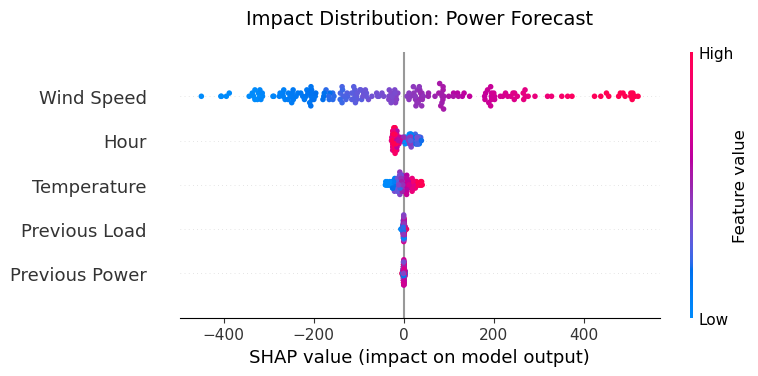

In [2]:

current_shap_raw = np.array(all_shap_dict[0])
s_flat, d_flat, names = get_flattened_data(current_shap_raw)
plt.figure(figsize=(10, 6))
shap.summary_plot(s_flat, d_flat, feature_names=names, show=False)
plt.title(f"Impact Distribution: Power Forecast", fontsize=14, pad=20)
plt.show()

### 2. Global Feature Importance
**What is this?** The mean absolute SHAP value for each feature.  
**What to focus on:** The length of the bar. It represents the "global" influence of a feature—how much it moves the prediction on average, regardless of direction.

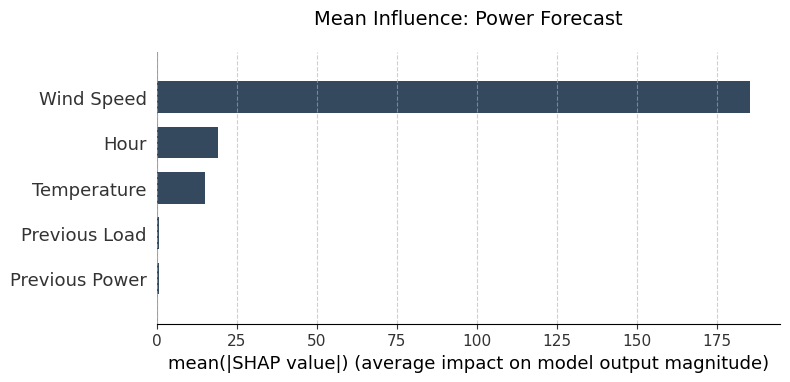

In [3]:

plt.figure(figsize=(10, 6))
shap.summary_plot(s_flat, d_flat, feature_names=names, plot_type='bar', show=False, color='#34495e')
plt.title(f"Mean Influence: Power Forecast", fontsize=14, pad=20)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

### 4. Focused View: Top 5 Drivers
**What is this?** A high-precision look at the five most critical variables for `Power Forecast`.  
**What to focus on:** The gap between the 1st and 5th feature. If the 1st is much larger, the model is heavily reliant on a single "smoking gun" variable.

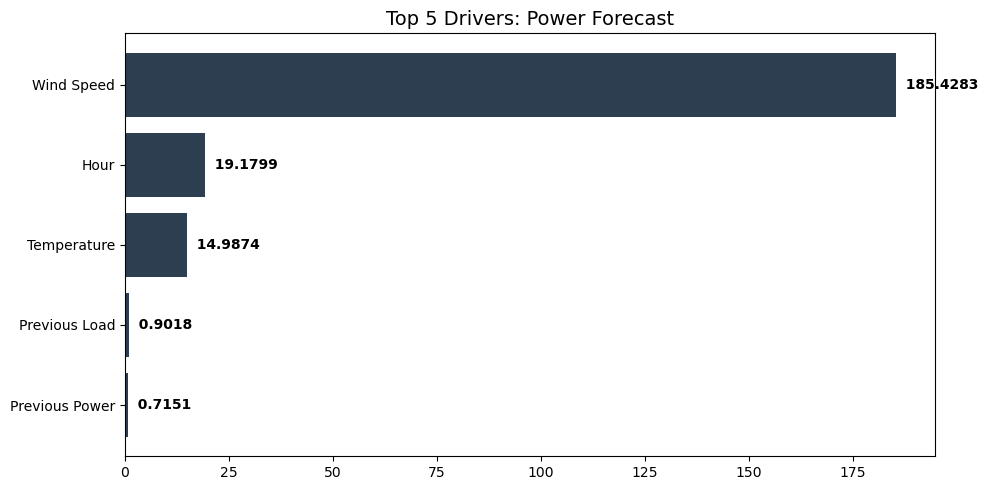

In [4]:

mean_shap = np.abs(s_flat).mean(axis=0)
sorted_idx = np.argsort(mean_shap)[-5:]
plt.figure(figsize=(10, 5))
plt.barh([names[i] for i in sorted_idx], mean_shap[sorted_idx], color='#2c3e50')
plt.title(f"Top 5 Drivers: Power Forecast", fontsize=14)
for i, v in enumerate(mean_shap[sorted_idx]):
    plt.text(v, i, f"  {v:.4f}", va='center', fontweight='bold')
plt.tight_layout()
plt.show()

--- 
# Analysis for: **Load Forecast**

## 🎯 Analysis for Target: `Load Forecast`
---

### 1. Feature Impact Distribution (Beeswarm)
**What is this?** A distribution of SHAP values for every sample in the dataset.  
**What to focus on:** * **Horizontal Position:** Points to the right increase the model output; points to the left decrease it.
* **Color:** Represents the feature value (**Red** is high, **Blue** is low). 
* **Insight:** If Red points are on the right, the feature has a positive correlation with the target.

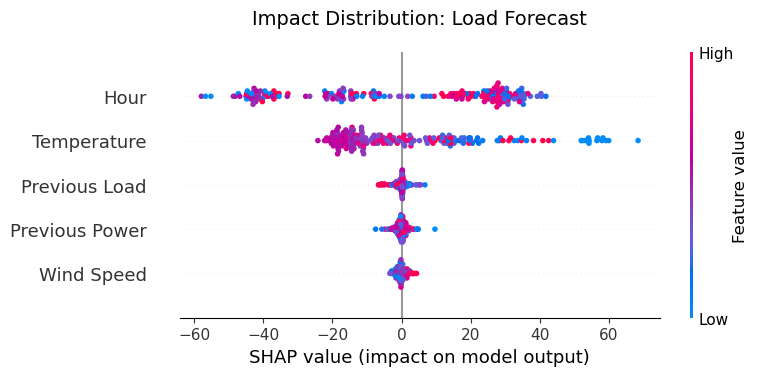

In [5]:

current_shap_raw = np.array(all_shap_dict[1])
s_flat, d_flat, names = get_flattened_data(current_shap_raw)
plt.figure(figsize=(10, 6))
shap.summary_plot(s_flat, d_flat, feature_names=names, show=False)
plt.title(f"Impact Distribution: Load Forecast", fontsize=14, pad=20)
plt.show()

### 2. Global Feature Importance
**What is this?** The mean absolute SHAP value for each feature.  
**What to focus on:** The length of the bar. It represents the "global" influence of a feature—how much it moves the prediction on average, regardless of direction.

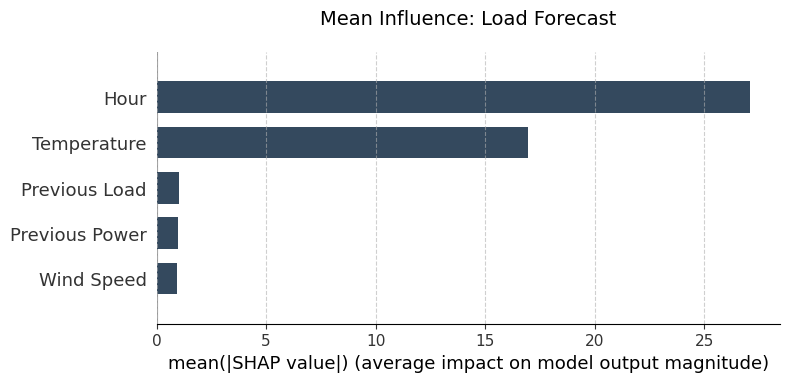

In [6]:

plt.figure(figsize=(10, 6))
shap.summary_plot(s_flat, d_flat, feature_names=names, plot_type='bar', show=False, color='#34495e')
plt.title(f"Mean Influence: Load Forecast", fontsize=14, pad=20)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

### 4. Focused View: Top 5 Drivers
**What is this?** A high-precision look at the five most critical variables for `Load Forecast`.  
**What to focus on:** The gap between the 1st and 5th feature. If the 1st is much larger, the model is heavily reliant on a single "smoking gun" variable.

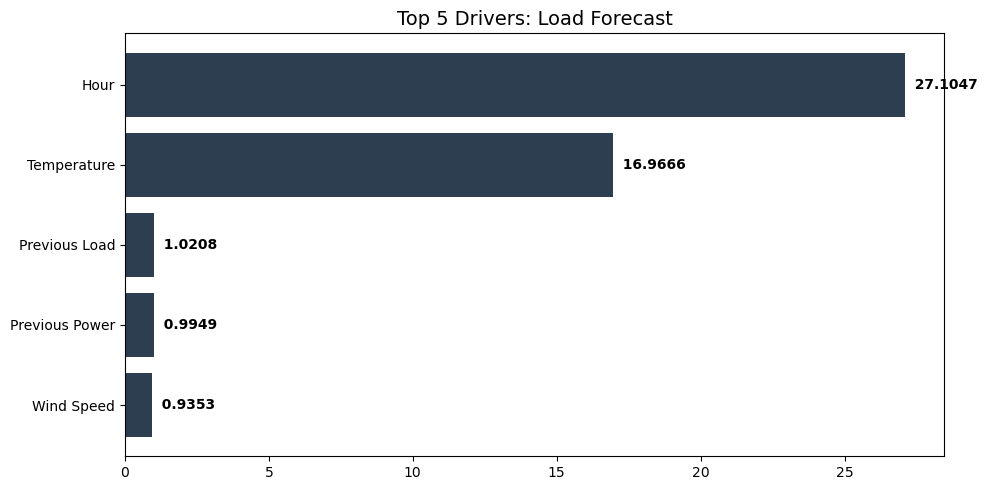

In [7]:

mean_shap = np.abs(s_flat).mean(axis=0)
sorted_idx = np.argsort(mean_shap)[-5:]
plt.figure(figsize=(10, 5))
plt.barh([names[i] for i in sorted_idx], mean_shap[sorted_idx], color='#2c3e50')
plt.title(f"Top 5 Drivers: Load Forecast", fontsize=14)
for i, v in enumerate(mean_shap[sorted_idx]):
    plt.text(v, i, f"  {v:.4f}", va='center', fontweight='bold')
plt.tight_layout()
plt.show()

--- 
# Analysis for: **Frequency Deviation**

## 🎯 Analysis for Target: `Frequency Deviation`
---

### 1. Feature Impact Distribution (Beeswarm)
**What is this?** A distribution of SHAP values for every sample in the dataset.  
**What to focus on:** * **Horizontal Position:** Points to the right increase the model output; points to the left decrease it.
* **Color:** Represents the feature value (**Red** is high, **Blue** is low). 
* **Insight:** If Red points are on the right, the feature has a positive correlation with the target.

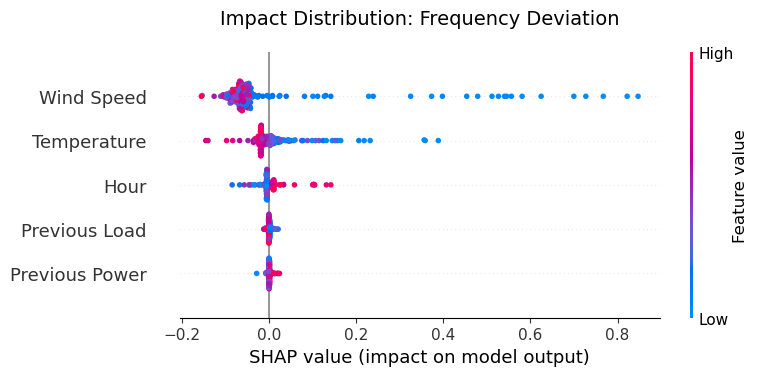

In [8]:

current_shap_raw = np.array(all_shap_dict[2])
s_flat, d_flat, names = get_flattened_data(current_shap_raw)
plt.figure(figsize=(10, 6))
shap.summary_plot(s_flat, d_flat, feature_names=names, show=False)
plt.title(f"Impact Distribution: Frequency Deviation", fontsize=14, pad=20)
plt.show()

### 2. Global Feature Importance
**What is this?** The mean absolute SHAP value for each feature.  
**What to focus on:** The length of the bar. It represents the "global" influence of a feature—how much it moves the prediction on average, regardless of direction.

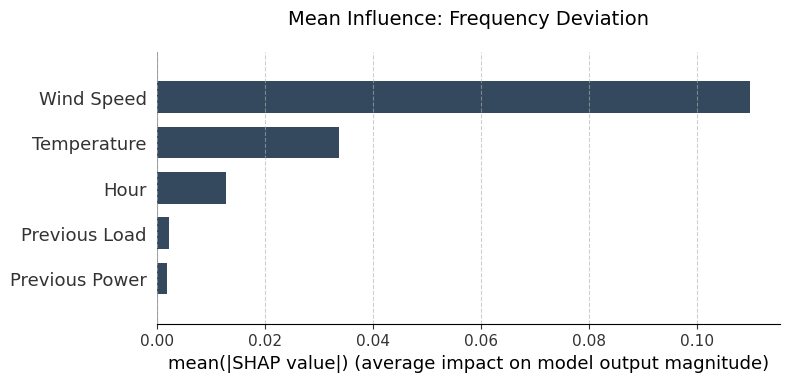

In [9]:

plt.figure(figsize=(10, 6))
shap.summary_plot(s_flat, d_flat, feature_names=names, plot_type='bar', show=False, color='#34495e')
plt.title(f"Mean Influence: Frequency Deviation", fontsize=14, pad=20)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

### 4. Focused View: Top 5 Drivers
**What is this?** A high-precision look at the five most critical variables for `Frequency Deviation`.  
**What to focus on:** The gap between the 1st and 5th feature. If the 1st is much larger, the model is heavily reliant on a single "smoking gun" variable.

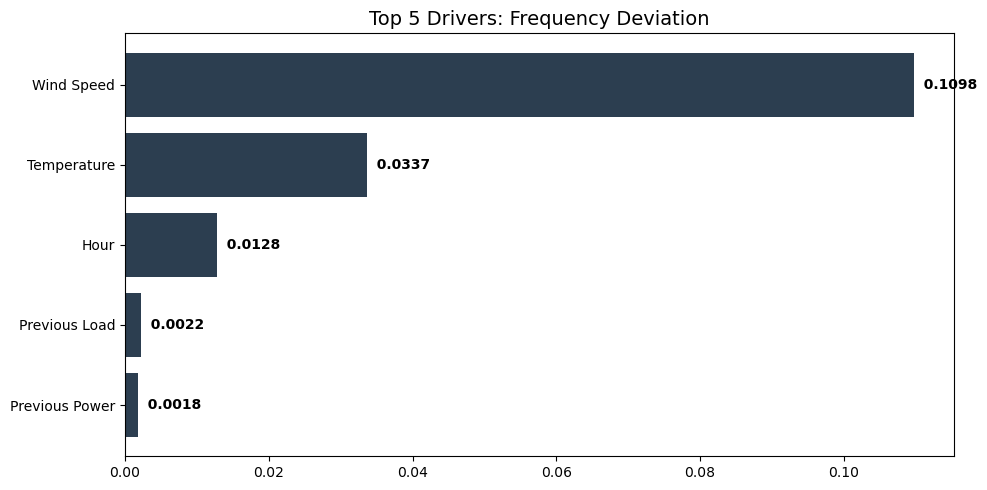

In [10]:

mean_shap = np.abs(s_flat).mean(axis=0)
sorted_idx = np.argsort(mean_shap)[-5:]
plt.figure(figsize=(10, 5))
plt.barh([names[i] for i in sorted_idx], mean_shap[sorted_idx], color='#2c3e50')
plt.title(f"Top 5 Drivers: Frequency Deviation", fontsize=14)
for i, v in enumerate(mean_shap[sorted_idx]):
    plt.text(v, i, f"  {v:.4f}", va='center', fontweight='bold')
plt.tight_layout()
plt.show()

--- 
# Analysis for: **Voltage Level**

## 🎯 Analysis for Target: `Voltage Level`
---

### 1. Feature Impact Distribution (Beeswarm)
**What is this?** A distribution of SHAP values for every sample in the dataset.  
**What to focus on:** * **Horizontal Position:** Points to the right increase the model output; points to the left decrease it.
* **Color:** Represents the feature value (**Red** is high, **Blue** is low). 
* **Insight:** If Red points are on the right, the feature has a positive correlation with the target.

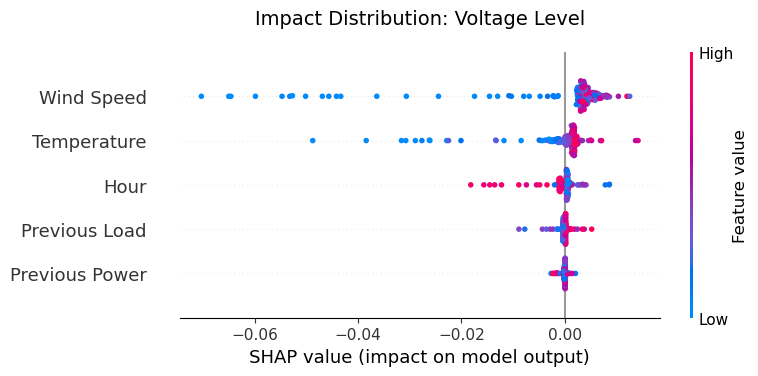

In [11]:

current_shap_raw = np.array(all_shap_dict[3])
s_flat, d_flat, names = get_flattened_data(current_shap_raw)
plt.figure(figsize=(10, 6))
shap.summary_plot(s_flat, d_flat, feature_names=names, show=False)
plt.title(f"Impact Distribution: Voltage Level", fontsize=14, pad=20)
plt.show()

### 2. Global Feature Importance
**What is this?** The mean absolute SHAP value for each feature.  
**What to focus on:** The length of the bar. It represents the "global" influence of a feature—how much it moves the prediction on average, regardless of direction.

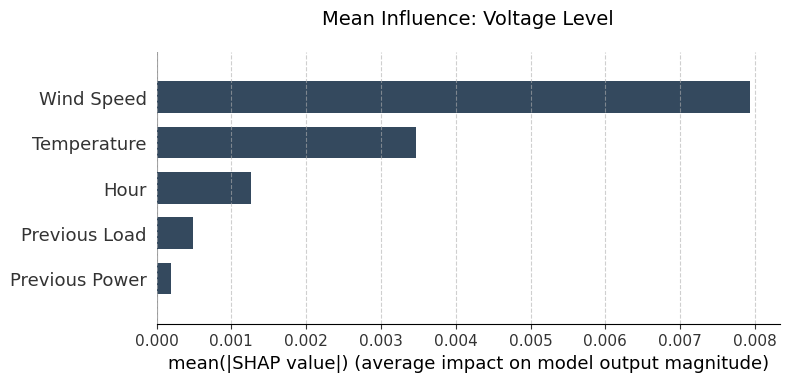

In [12]:

plt.figure(figsize=(10, 6))
shap.summary_plot(s_flat, d_flat, feature_names=names, plot_type='bar', show=False, color='#34495e')
plt.title(f"Mean Influence: Voltage Level", fontsize=14, pad=20)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

### 4. Focused View: Top 5 Drivers
**What is this?** A high-precision look at the five most critical variables for `Voltage Level`.  
**What to focus on:** The gap between the 1st and 5th feature. If the 1st is much larger, the model is heavily reliant on a single "smoking gun" variable.

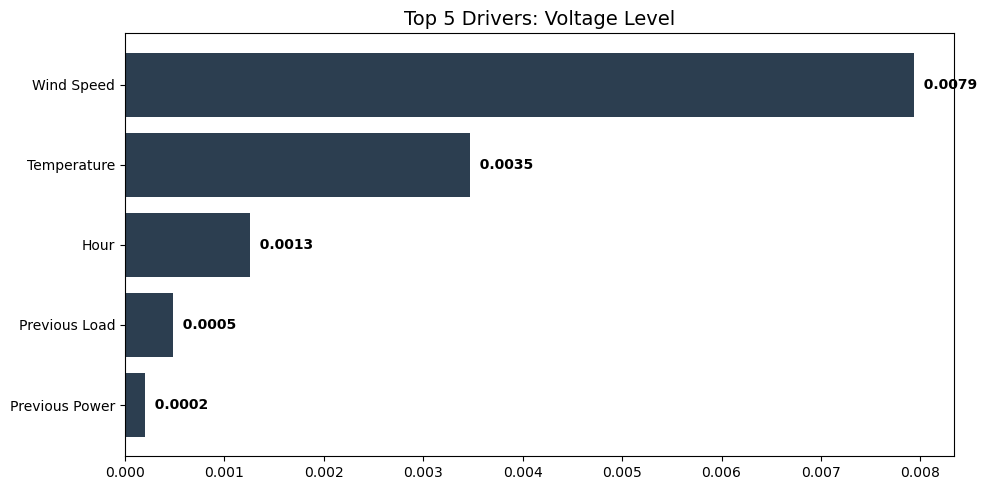

In [13]:

mean_shap = np.abs(s_flat).mean(axis=0)
sorted_idx = np.argsort(mean_shap)[-5:]
plt.figure(figsize=(10, 5))
plt.barh([names[i] for i in sorted_idx], mean_shap[sorted_idx], color='#2c3e50')
plt.title(f"Top 5 Drivers: Voltage Level", fontsize=14)
for i, v in enumerate(mean_shap[sorted_idx]):
    plt.text(v, i, f"  {v:.4f}", va='center', fontweight='bold')
plt.tight_layout()
plt.show()

--- 
# Analysis for: **Reserve Requirement**

## 🎯 Analysis for Target: `Reserve Requirement`
---

### 1. Feature Impact Distribution (Beeswarm)
**What is this?** A distribution of SHAP values for every sample in the dataset.  
**What to focus on:** * **Horizontal Position:** Points to the right increase the model output; points to the left decrease it.
* **Color:** Represents the feature value (**Red** is high, **Blue** is low). 
* **Insight:** If Red points are on the right, the feature has a positive correlation with the target.

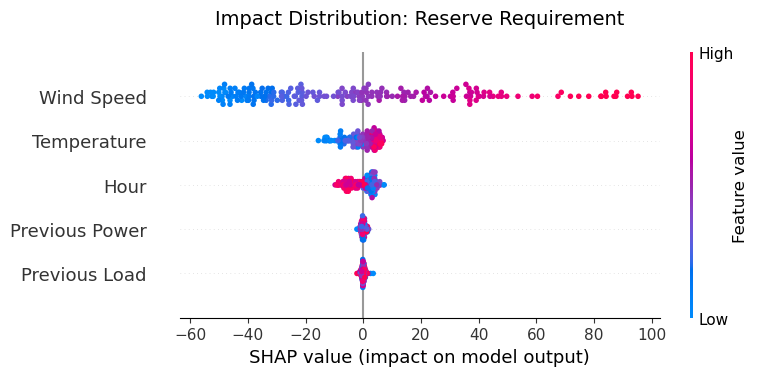

In [14]:

current_shap_raw = np.array(all_shap_dict[4])
s_flat, d_flat, names = get_flattened_data(current_shap_raw)
plt.figure(figsize=(10, 6))
shap.summary_plot(s_flat, d_flat, feature_names=names, show=False)
plt.title(f"Impact Distribution: Reserve Requirement", fontsize=14, pad=20)
plt.show()

### 2. Global Feature Importance
**What is this?** The mean absolute SHAP value for each feature.  
**What to focus on:** The length of the bar. It represents the "global" influence of a feature—how much it moves the prediction on average, regardless of direction.

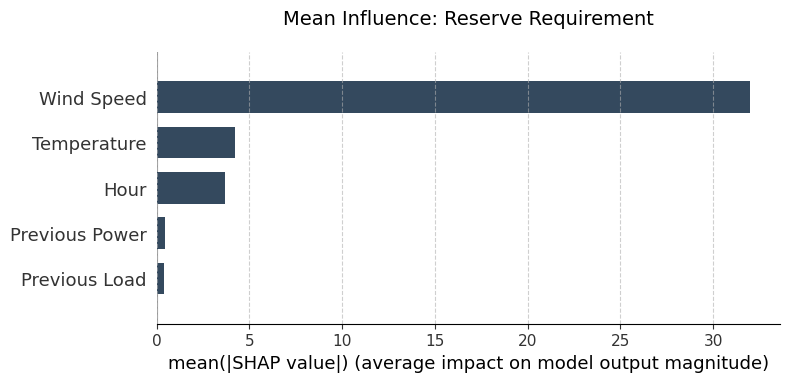

In [15]:

plt.figure(figsize=(10, 6))
shap.summary_plot(s_flat, d_flat, feature_names=names, plot_type='bar', show=False, color='#34495e')
plt.title(f"Mean Influence: Reserve Requirement", fontsize=14, pad=20)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

### 4. Focused View: Top 5 Drivers
**What is this?** A high-precision look at the five most critical variables for `Reserve Requirement`.  
**What to focus on:** The gap between the 1st and 5th feature. If the 1st is much larger, the model is heavily reliant on a single "smoking gun" variable.

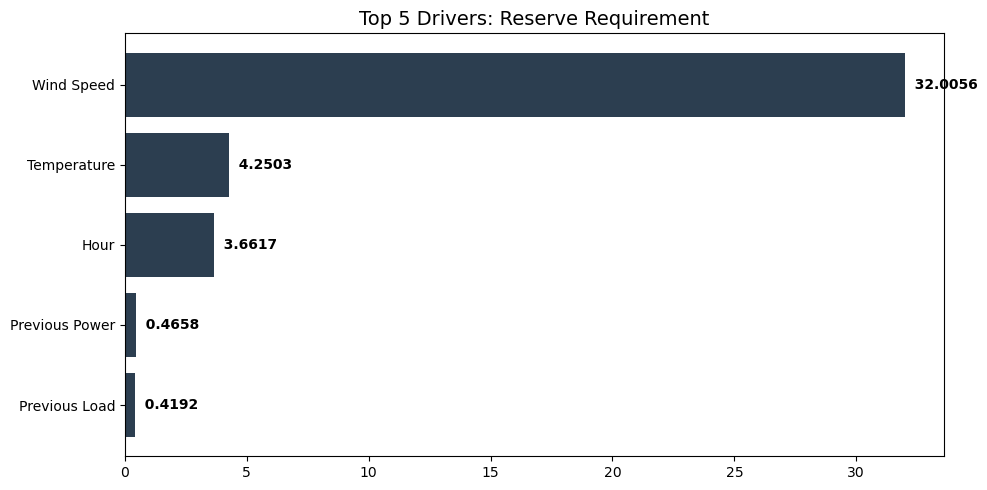

In [16]:

mean_shap = np.abs(s_flat).mean(axis=0)
sorted_idx = np.argsort(mean_shap)[-5:]
plt.figure(figsize=(10, 5))
plt.barh([names[i] for i in sorted_idx], mean_shap[sorted_idx], color='#2c3e50')
plt.title(f"Top 5 Drivers: Reserve Requirement", fontsize=14)
for i, v in enumerate(mean_shap[sorted_idx]):
    plt.text(v, i, f"  {v:.4f}", va='center', fontweight='bold')
plt.tight_layout()
plt.show()